In [1]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from sklearn.preprocessing import scale

from data_cube import DataCube
from ssm import SSM
from similarity_network_fusion import SNF

In [2]:
from tslearn.metrics import dtw, dtw_path

In [3]:
dc = DataCube(
    subjects="all",
    gestures=["1"],
    channels=["2", "8"],
    data_grp="parsed"
)
dc.load_data()
dc.rms_smooth(300, 20)
dc.normalize_modalities(smooth=True)

---

subject 30; gesture 1_1_2


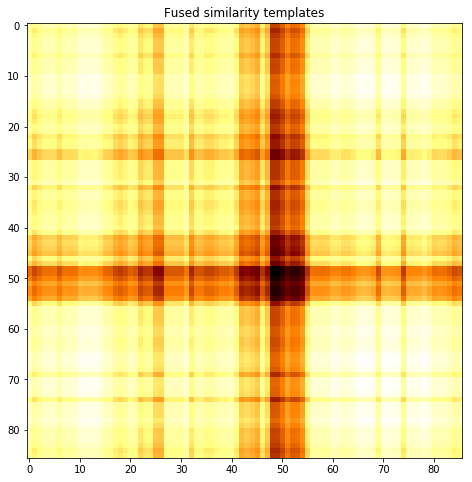

subject 30; gesture 1_1_1


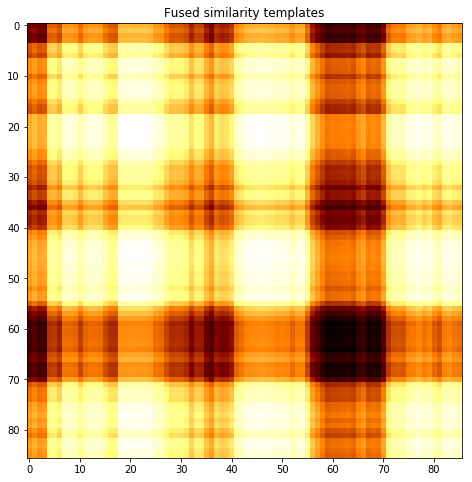

subject 30; gesture 1_0_1


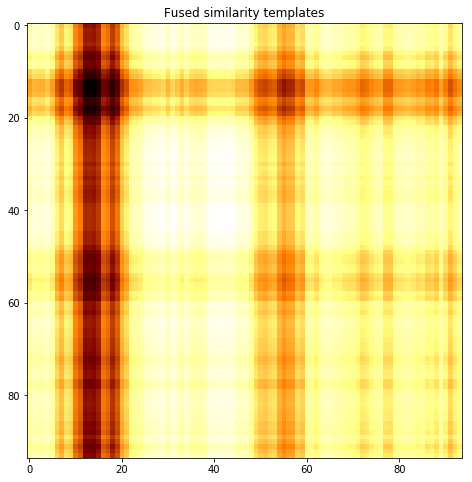

subject 30; gesture 1_0_2


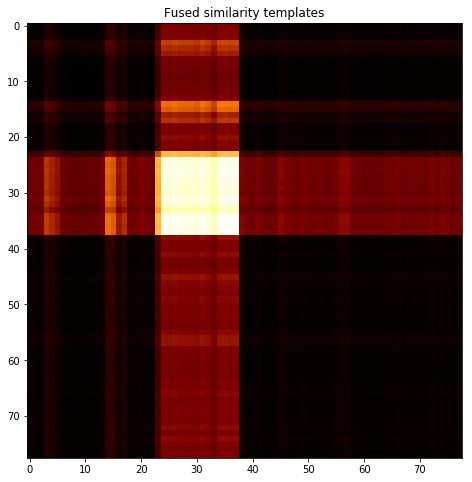

subject 06; gesture 1_1_2


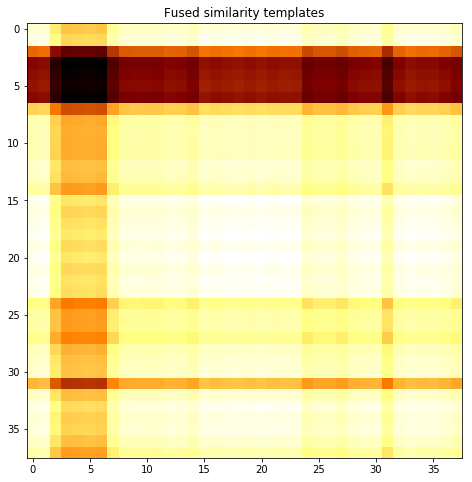

subject 06; gesture 1_1_1


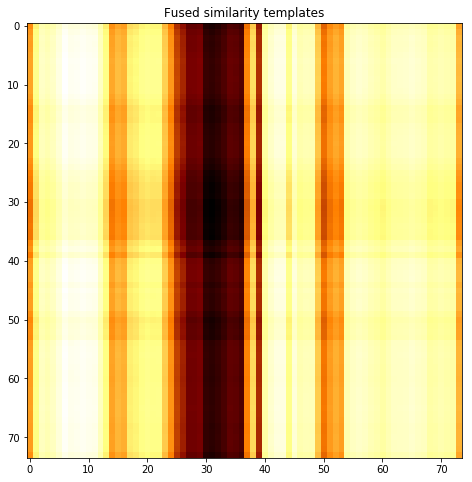

subject 06; gesture 1_0_1


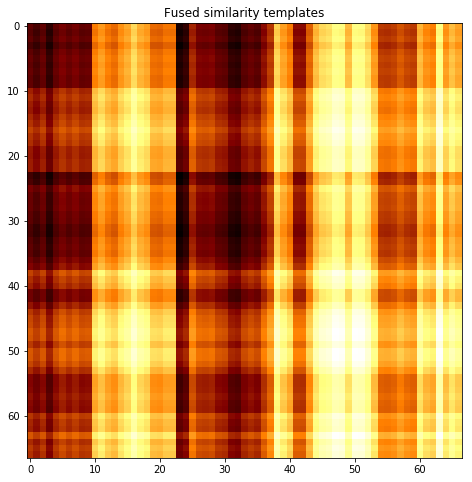

subject 06; gesture 1_0_2


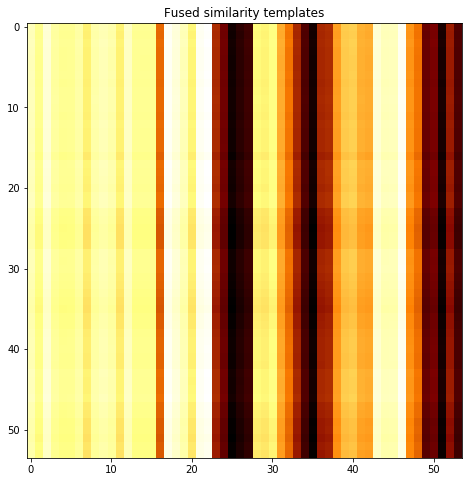

subject 09; gesture 1_1_2


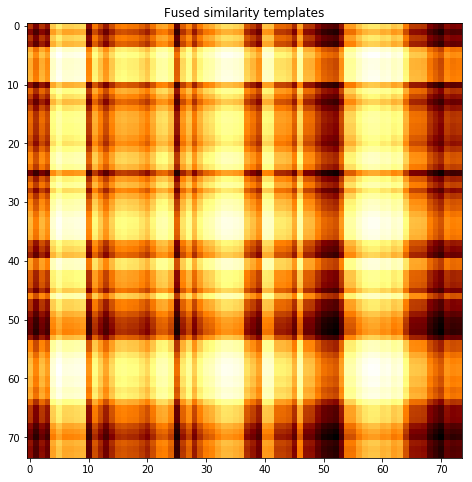

subject 09; gesture 1_1_1


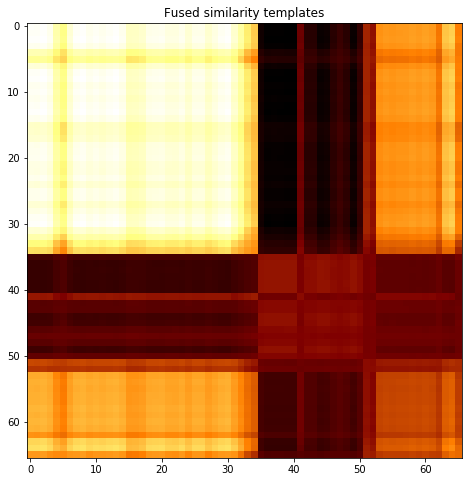

subject 09; gesture 1_0_1


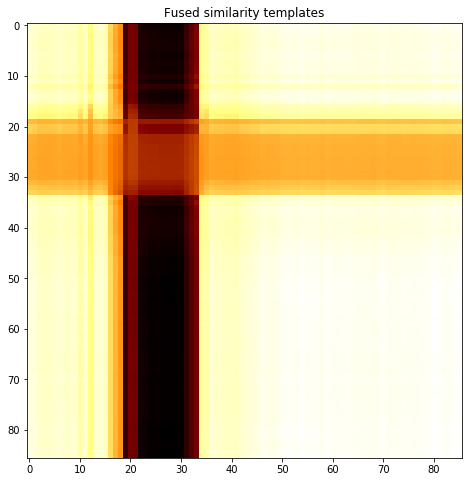

subject 09; gesture 1_0_2


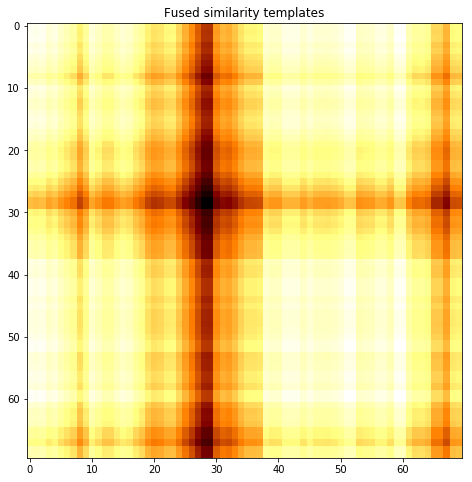

subject 03; gesture 1_1_2


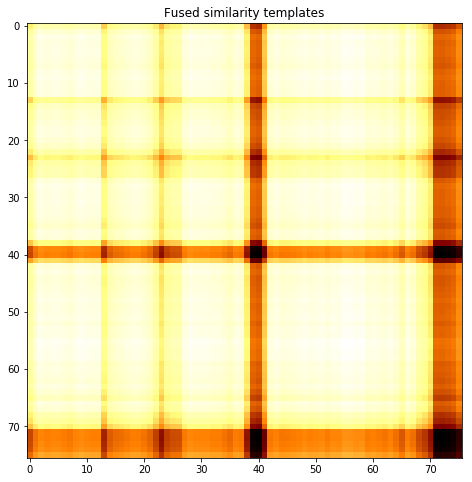

subject 03; gesture 1_1_1


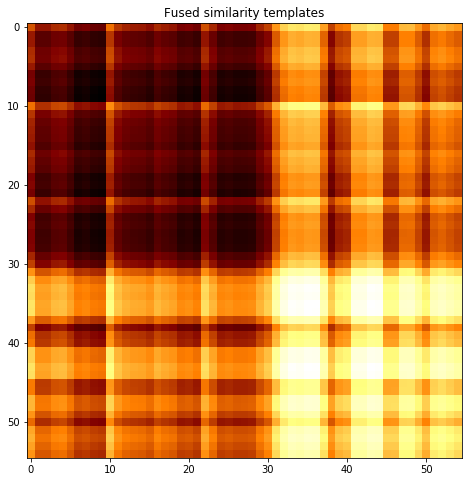

subject 03; gesture 1_0_1


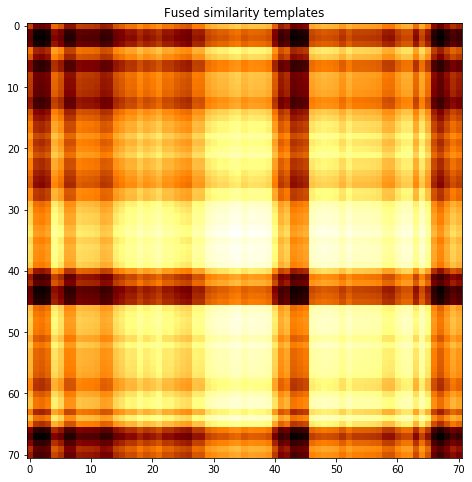

subject 03; gesture 1_0_2


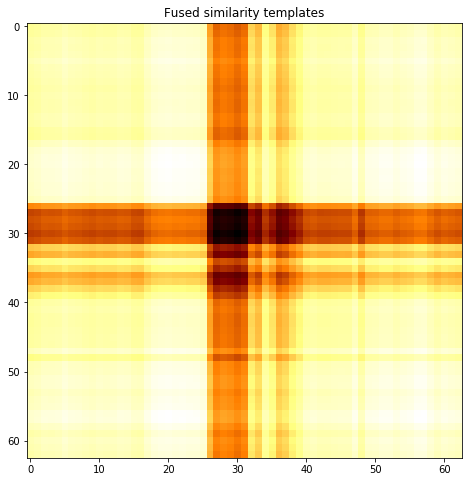

subject 05; gesture 1_1_2


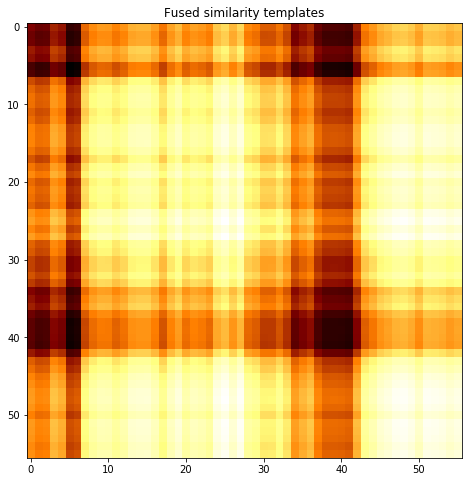

subject 05; gesture 1_1_1


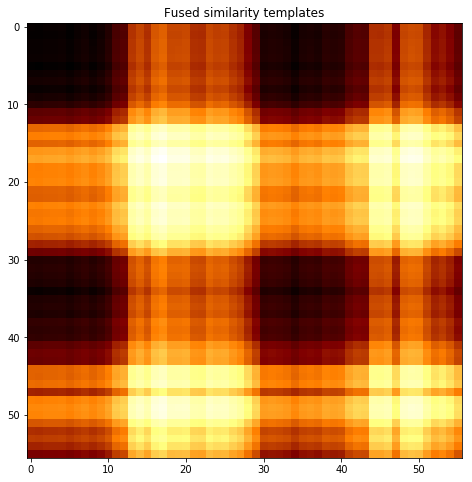

subject 05; gesture 1_0_1


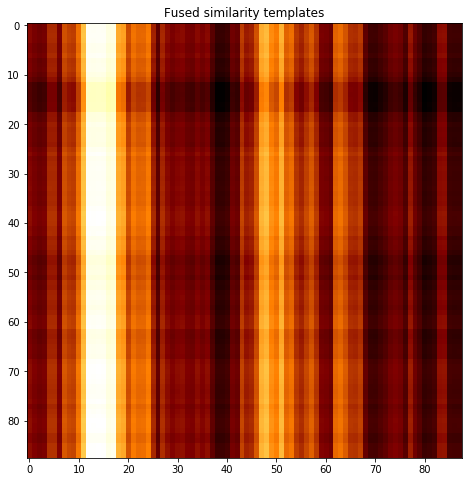

subject 05; gesture 1_0_2


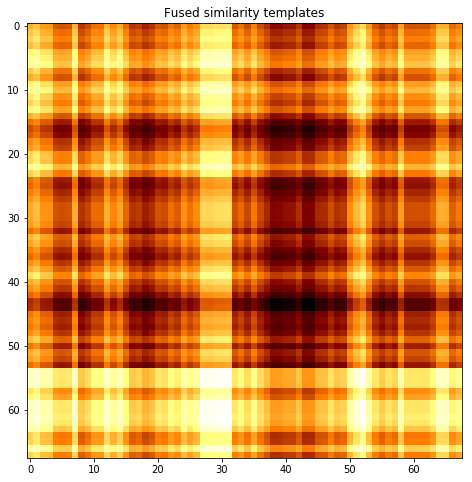

subject 21; gesture 1_1_2


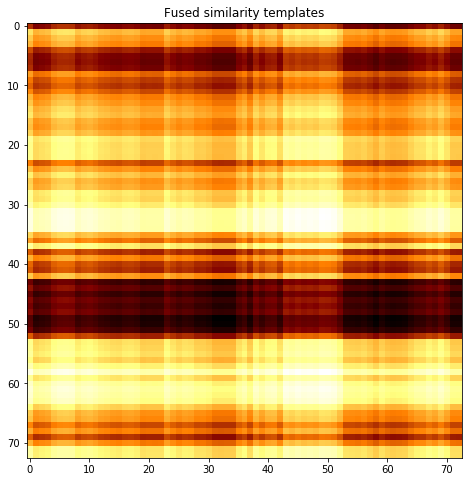

subject 21; gesture 1_1_1


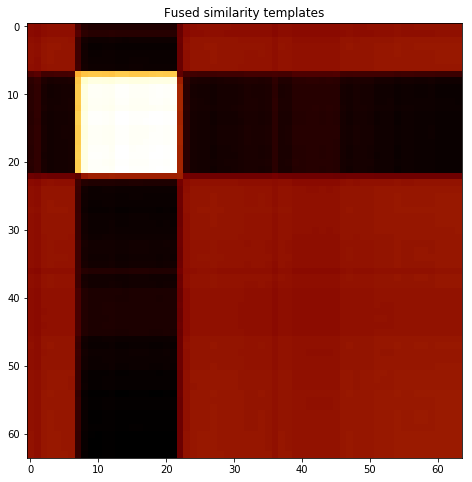

subject 21; gesture 1_0_1


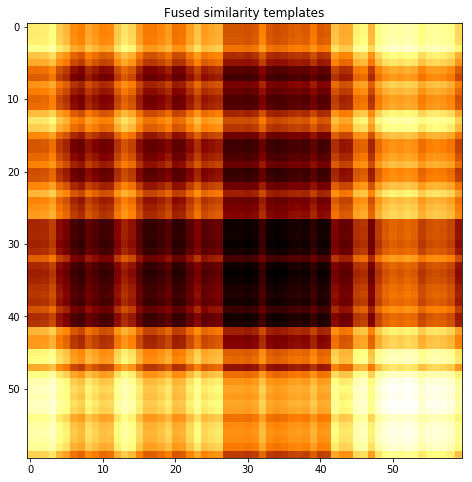

subject 21; gesture 1_0_2


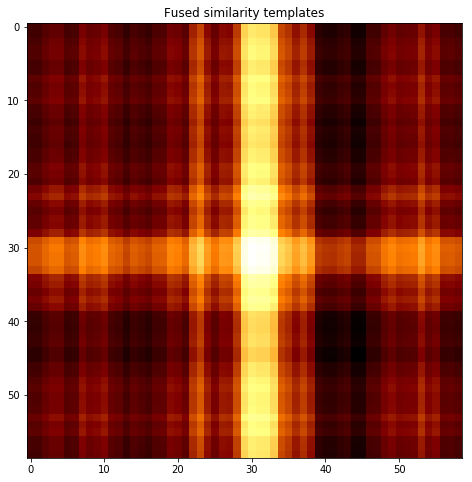

subject 17; gesture 1_1_2


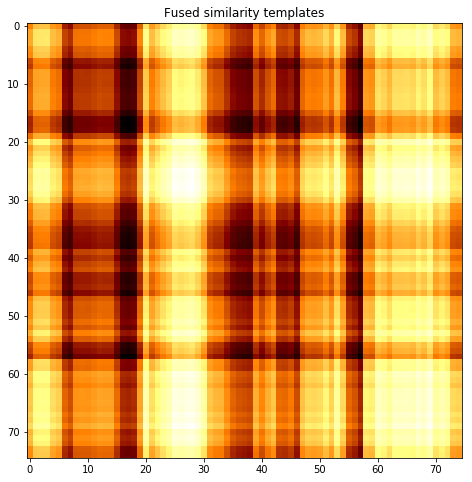

subject 17; gesture 1_1_1


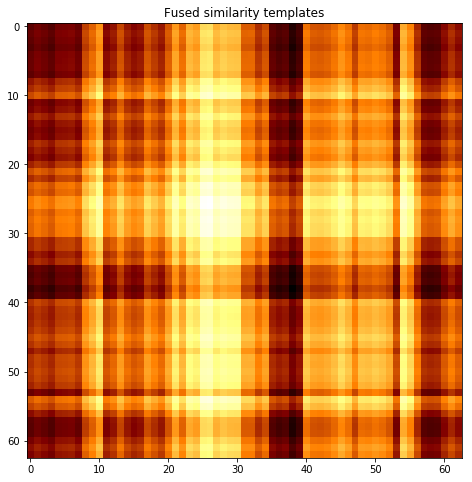

subject 17; gesture 1_0_1


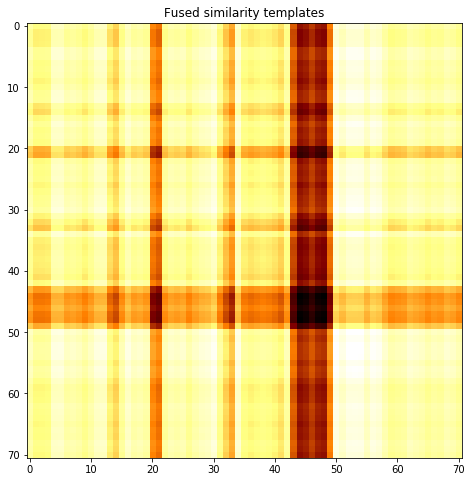

subject 17; gesture 1_0_2


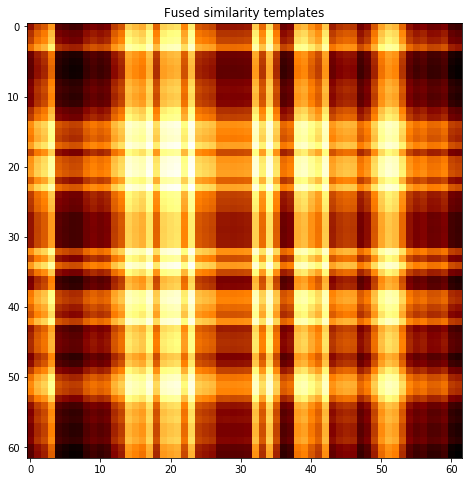

subject 01; gesture 1_1_2


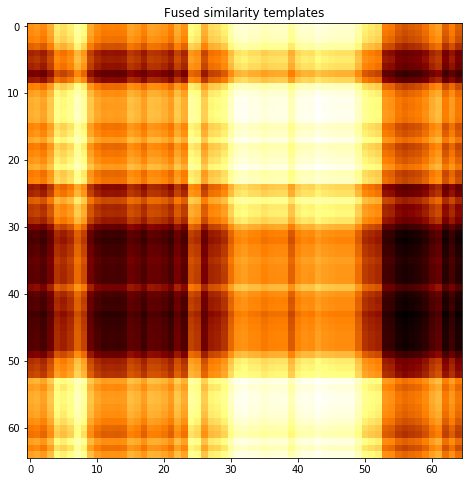

subject 01; gesture 1_1_1


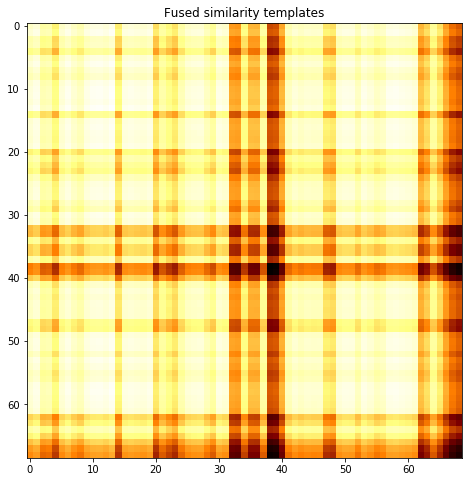

subject 01; gesture 1_0_1


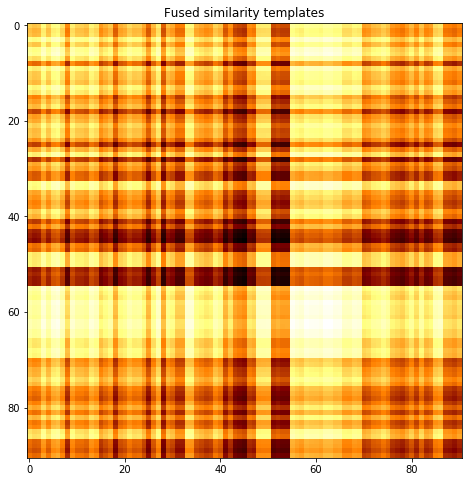

subject 01; gesture 1_0_2


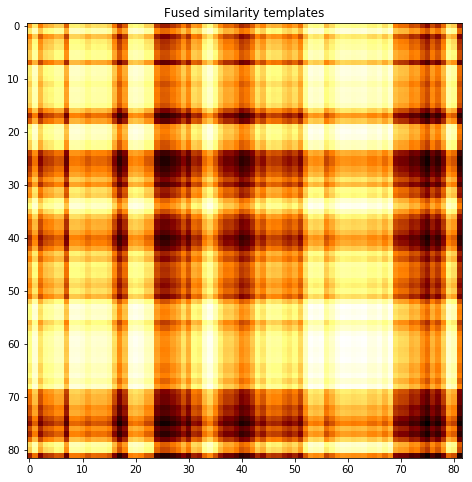

subject 16; gesture 1_1_2


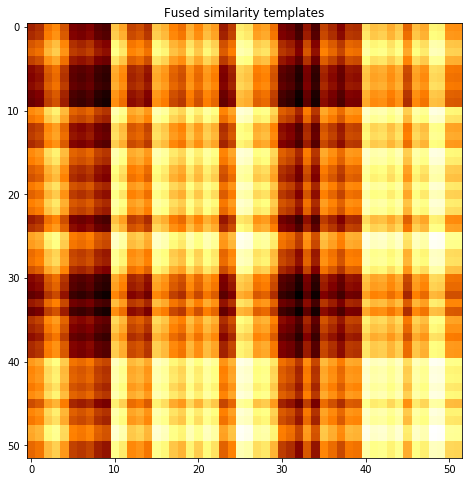

subject 16; gesture 1_1_1


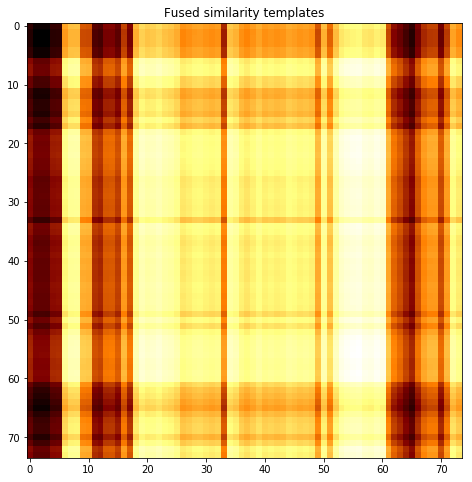

subject 16; gesture 1_0_1


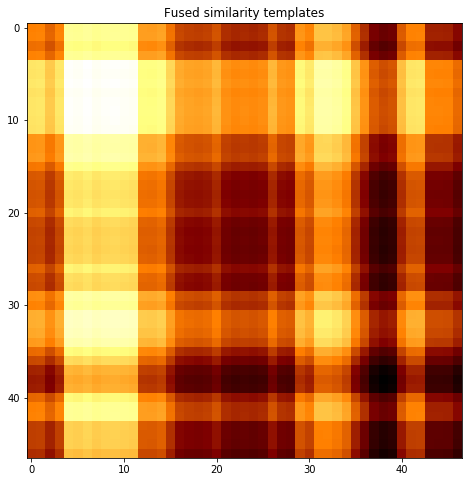

subject 16; gesture 1_0_2


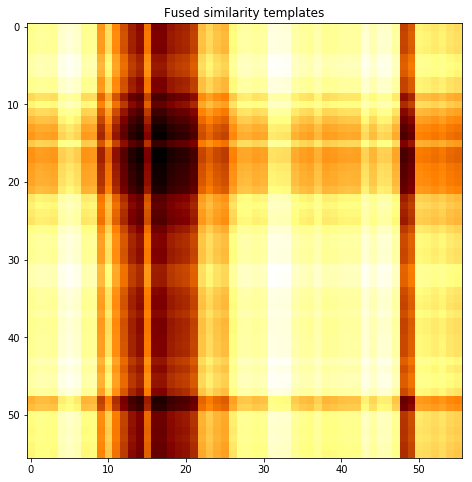

subject 26; gesture 1_1_2


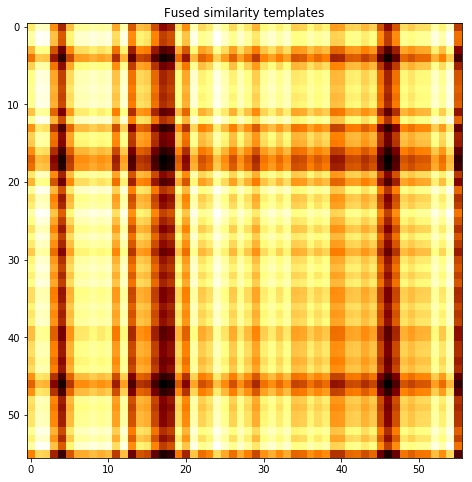

subject 26; gesture 1_1_1


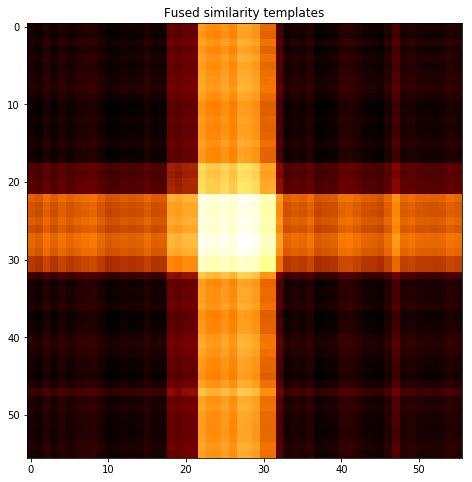

subject 26; gesture 1_0_1


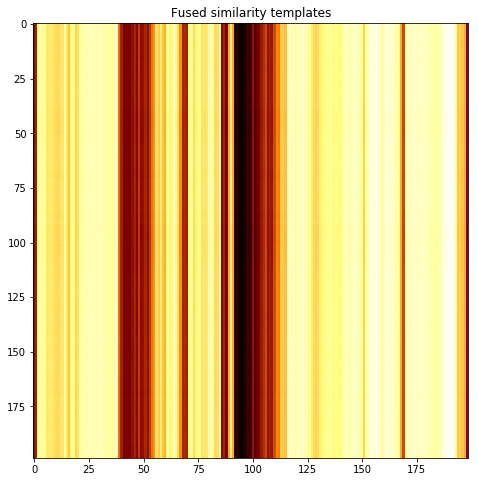

subject 26; gesture 1_0_2


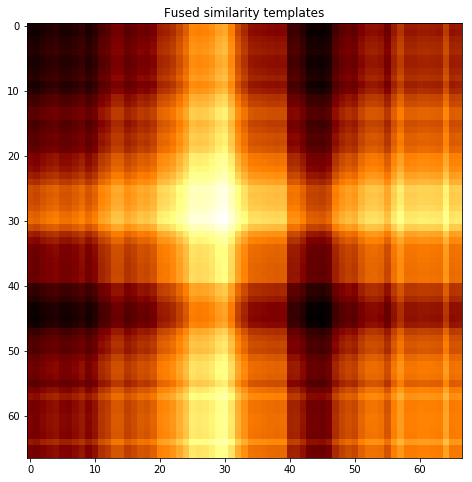

subject 32; gesture 1_1_2


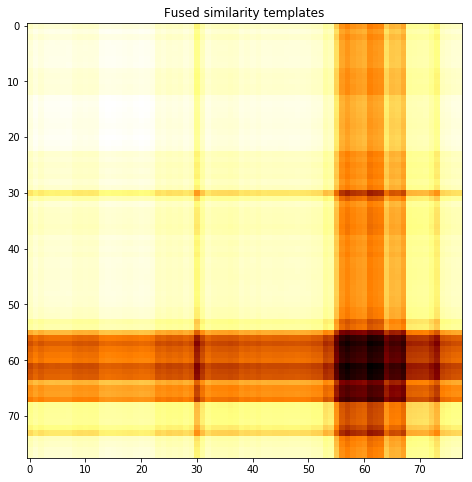

subject 32; gesture 1_1_1


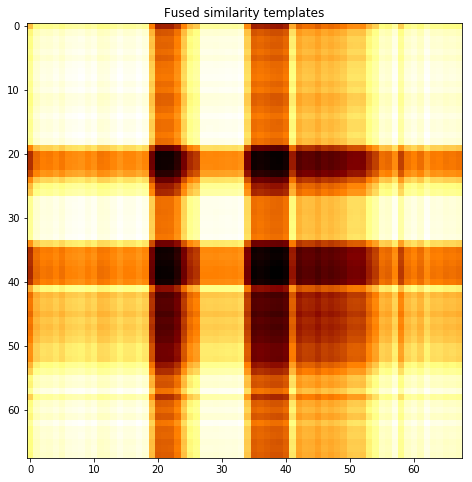

subject 32; gesture 1_0_1


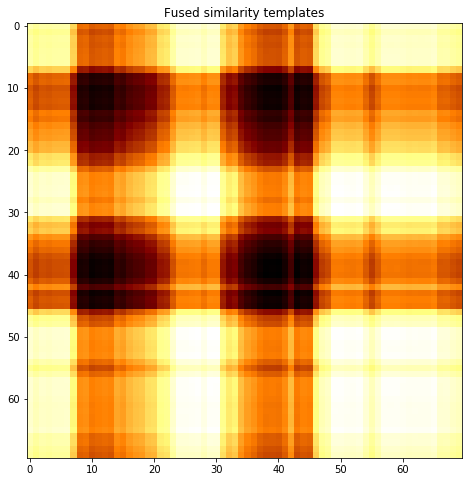

subject 32; gesture 1_0_2


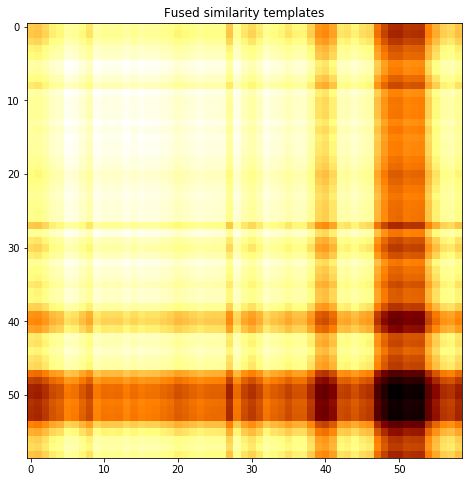

subject 04; gesture 1_1_2


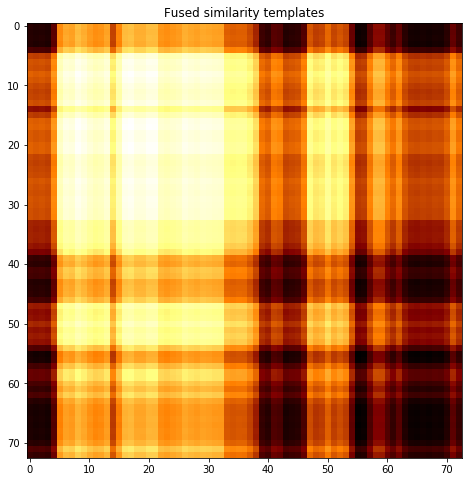

subject 04; gesture 1_1_1


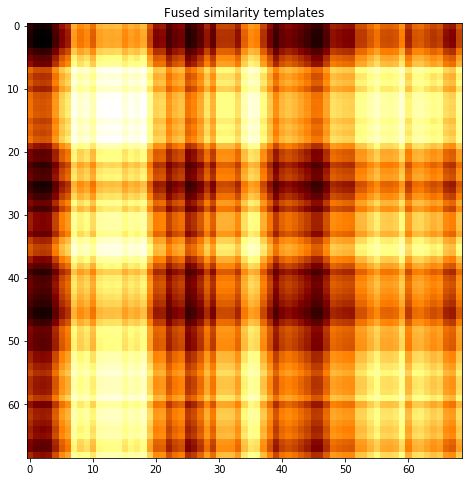

subject 04; gesture 1_0_1


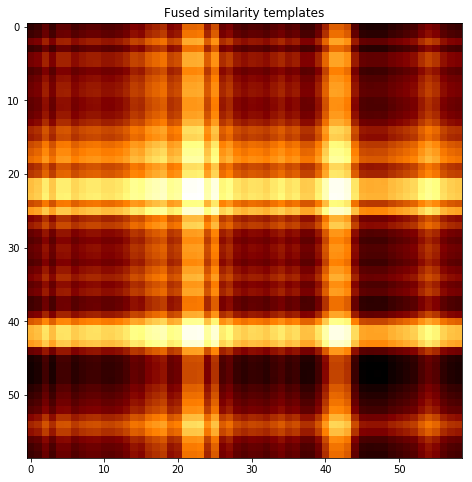

subject 04; gesture 1_0_2


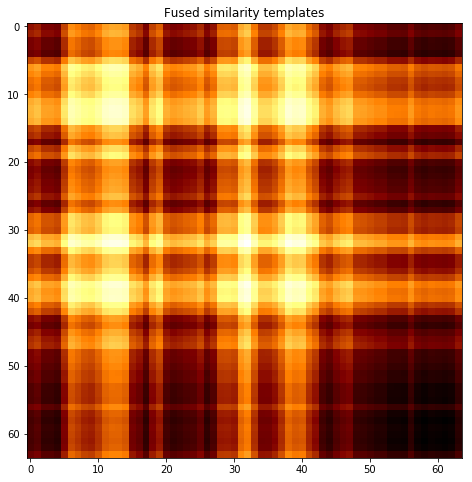

subject 08; gesture 1_1_2


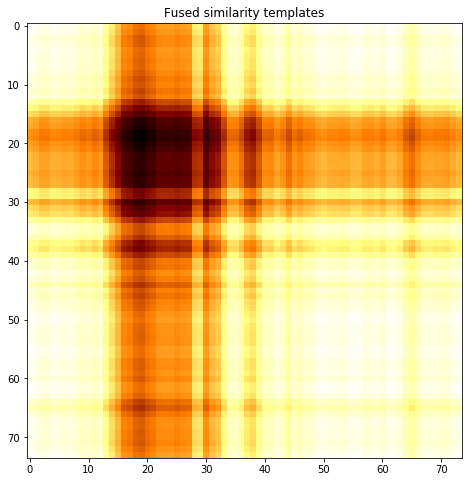

subject 08; gesture 1_1_1


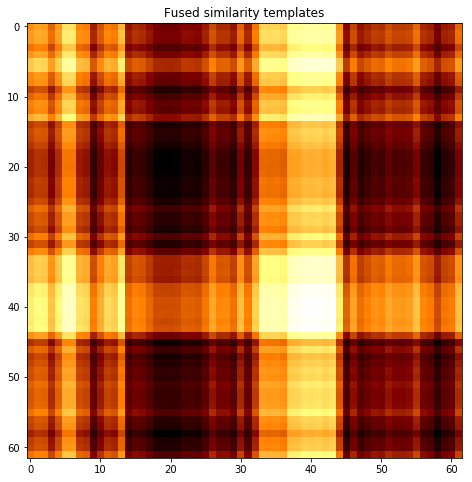

subject 08; gesture 1_0_1


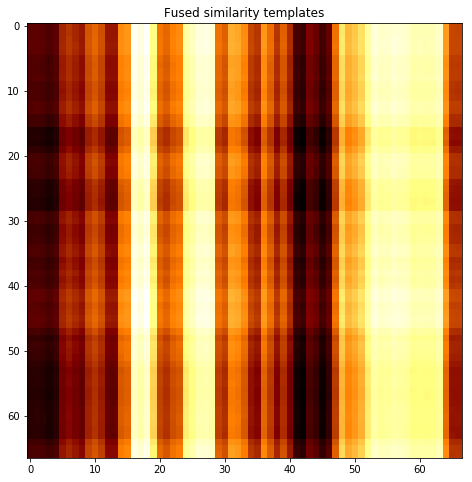

subject 08; gesture 1_0_2


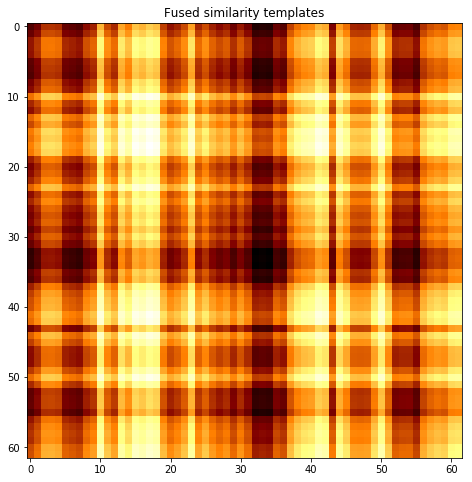

subject 27; gesture 1_1_2


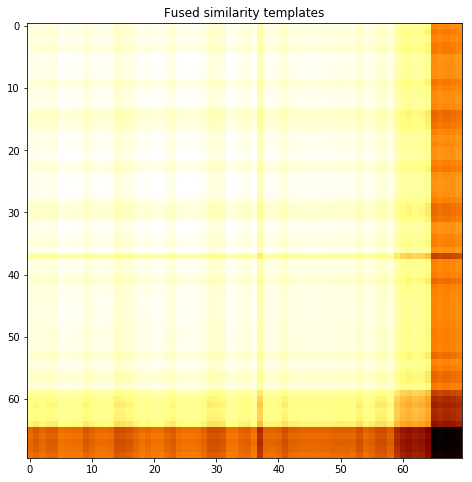

subject 27; gesture 1_1_1


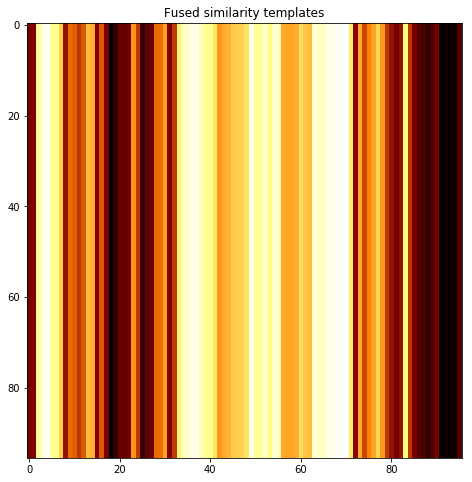

subject 27; gesture 1_0_1


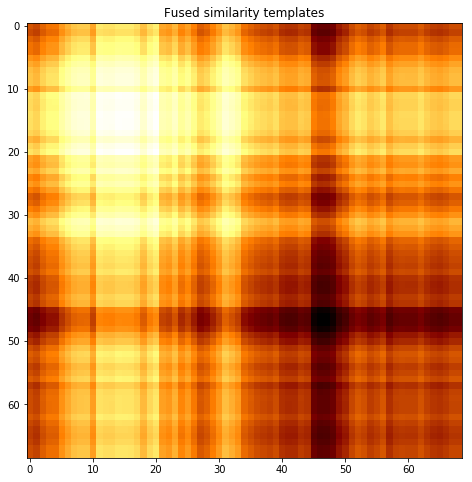

subject 27; gesture 1_0_2


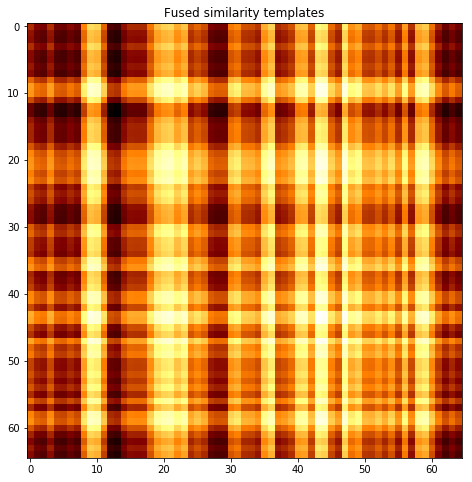

subject 14; gesture 1_1_2


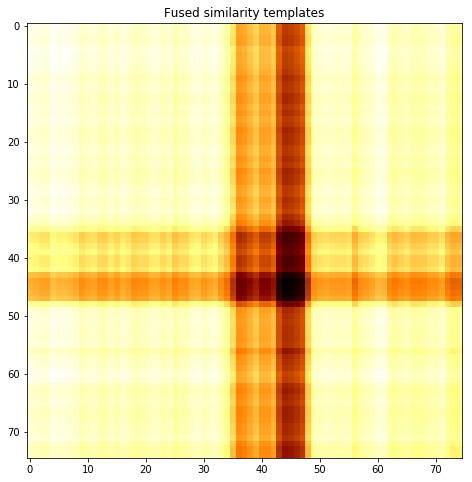

subject 14; gesture 1_1_1


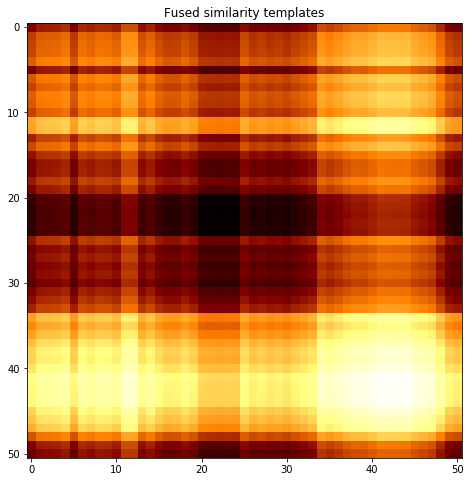

subject 14; gesture 1_0_1


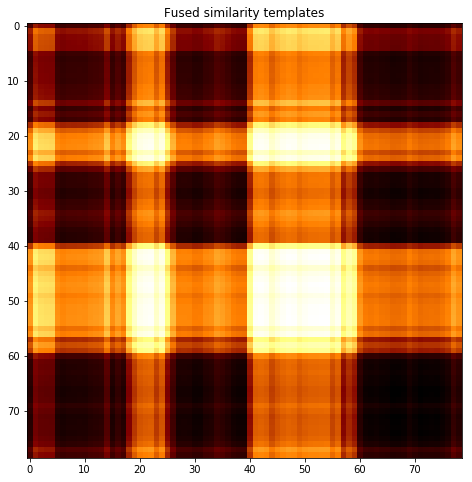

subject 14; gesture 1_0_2


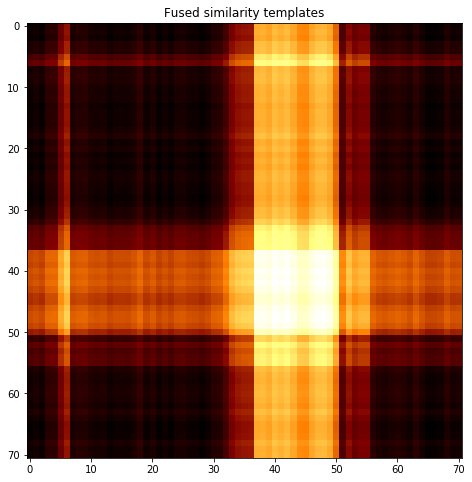

subject 23; gesture 1_1_2


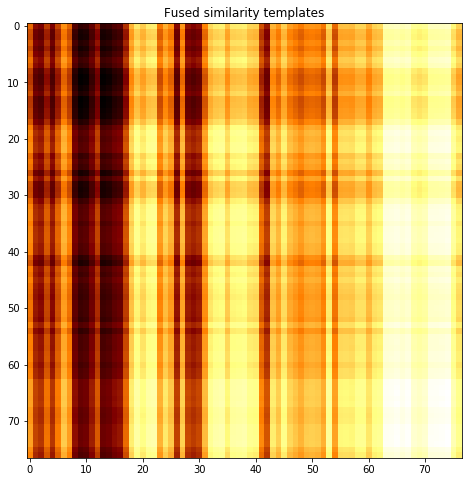

subject 23; gesture 1_1_1


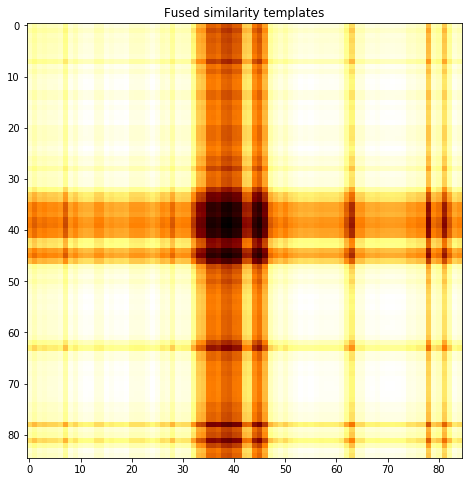

subject 23; gesture 1_0_1


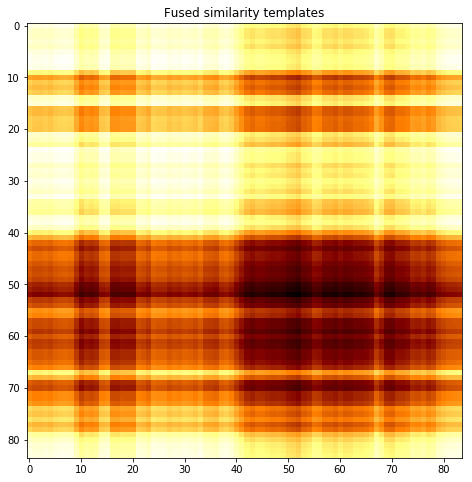

subject 23; gesture 1_0_2


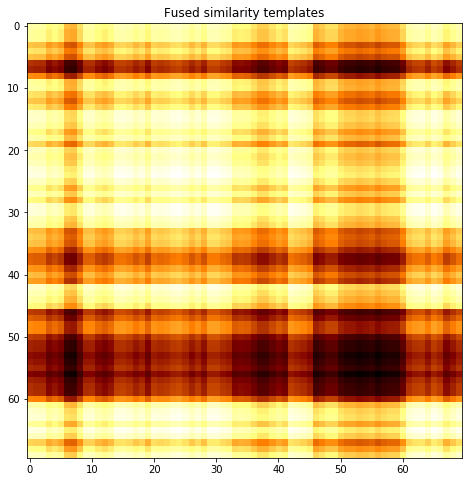

subject 25; gesture 1_1_2


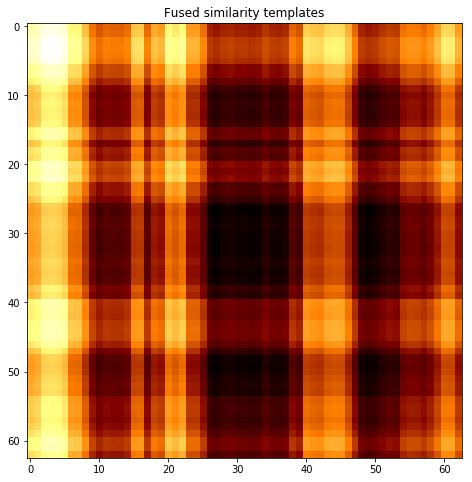

subject 25; gesture 1_1_1


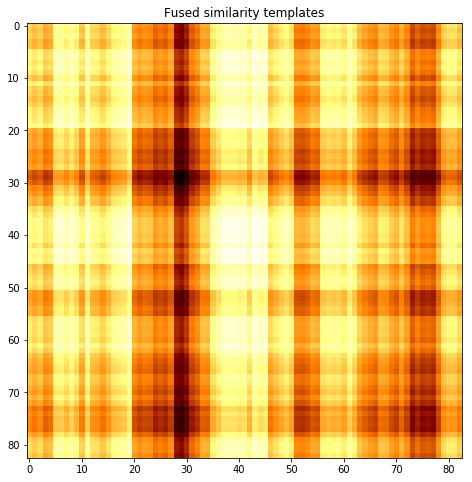

subject 25; gesture 1_0_1


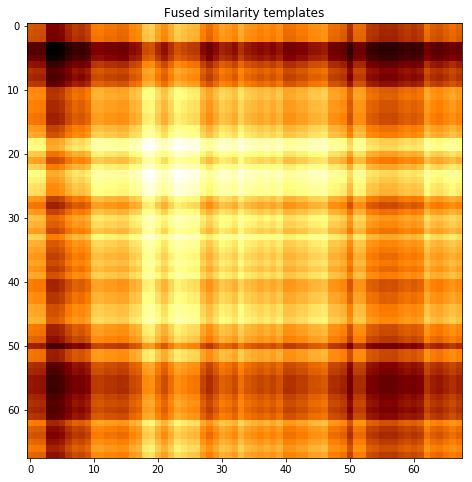

subject 25; gesture 1_0_2


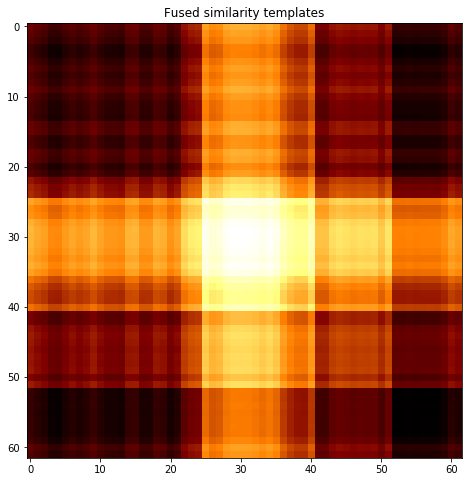

subject 18; gesture 1_1_2


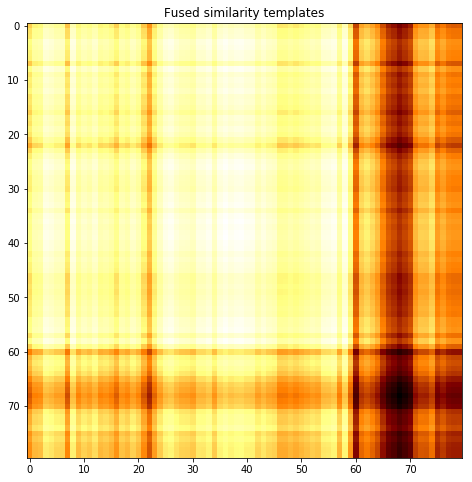

subject 18; gesture 1_1_1


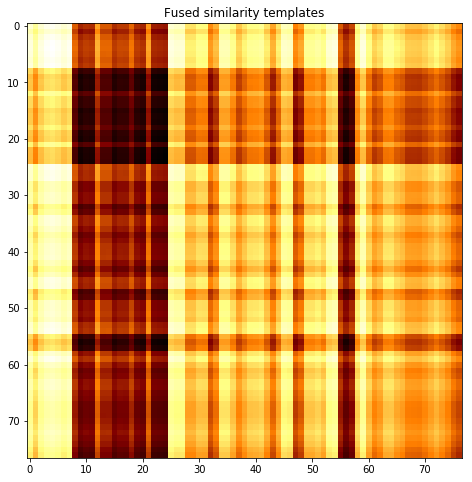

subject 18; gesture 1_0_1


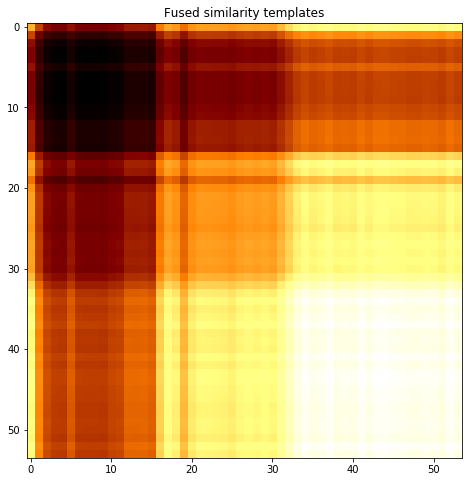

subject 18; gesture 1_0_2


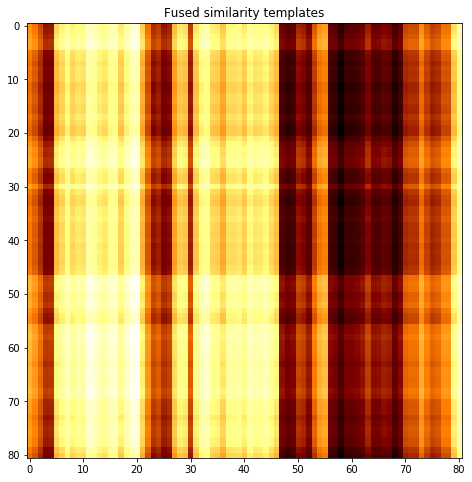

subject 29; gesture 1_1_2


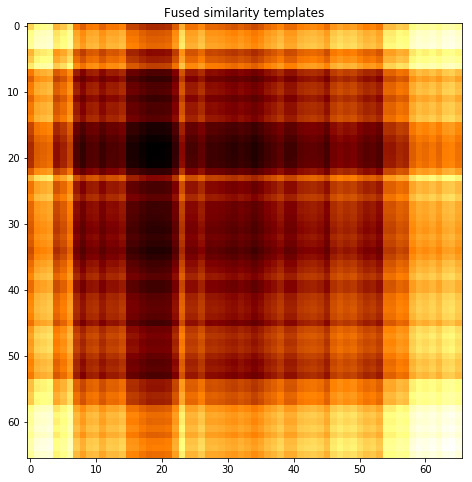

subject 29; gesture 1_1_1


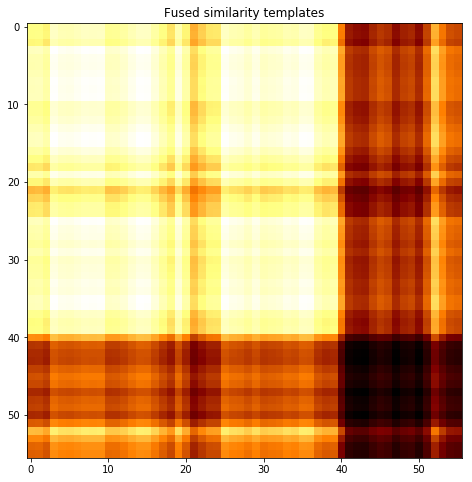

subject 29; gesture 1_0_1


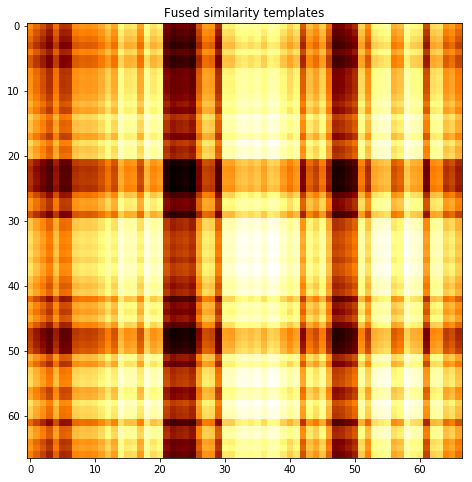

subject 29; gesture 1_0_2


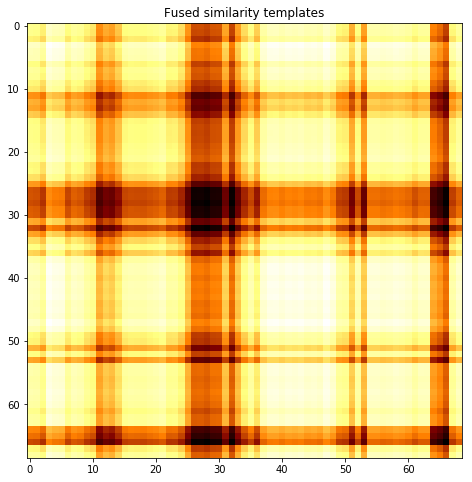

subject 15; gesture 1_1_2


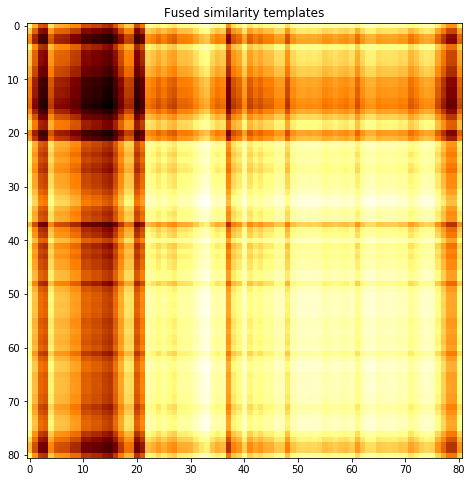

subject 15; gesture 1_1_1


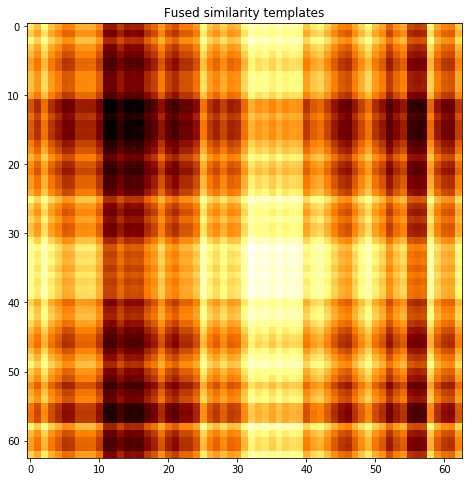

subject 15; gesture 1_0_1


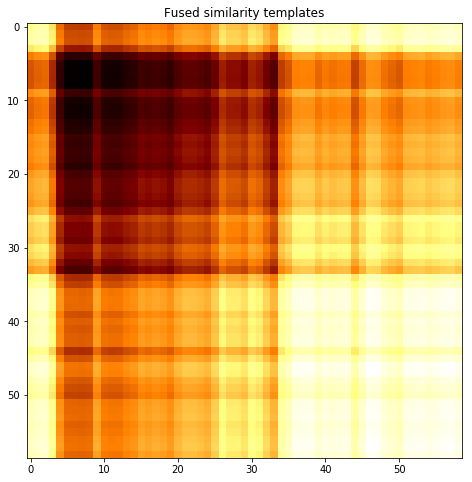

subject 15; gesture 1_0_2


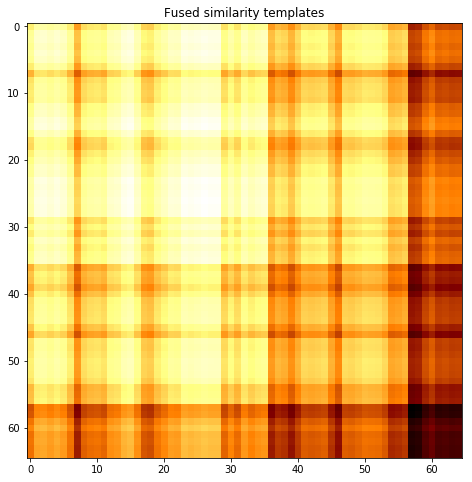

subject 28; gesture 1_1_2


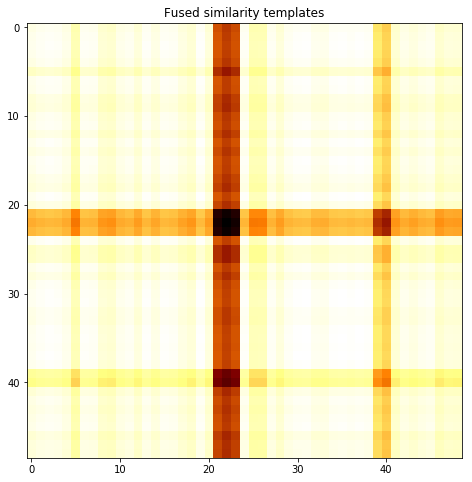

subject 28; gesture 1_1_1


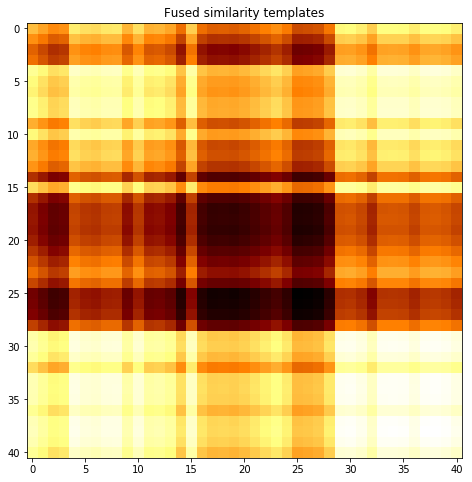

subject 28; gesture 1_0_1


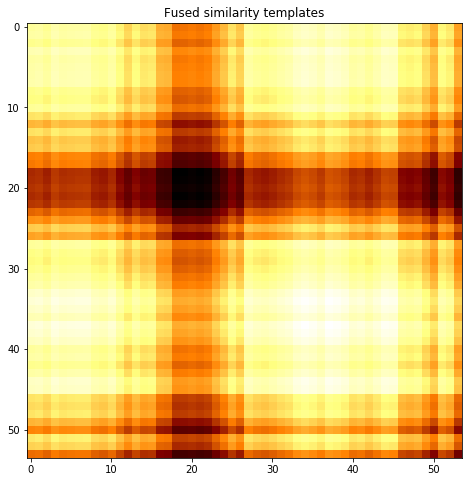

subject 28; gesture 1_0_2


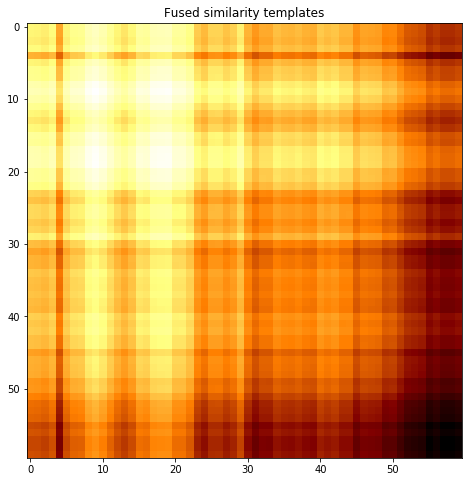

subject 12; gesture 1_1_2


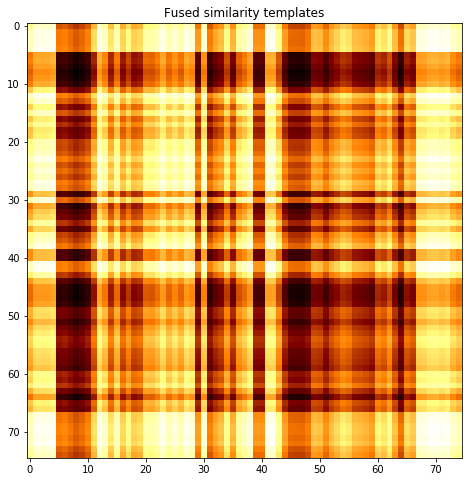

subject 12; gesture 1_1_1


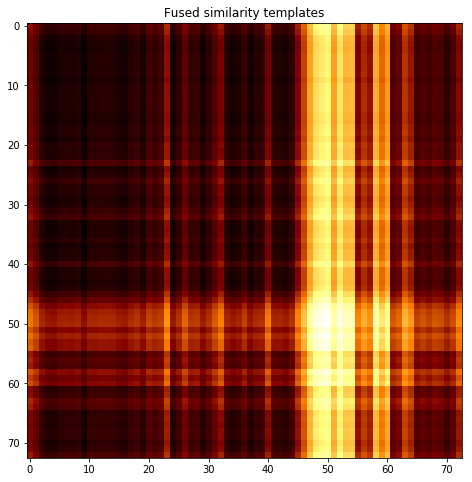

subject 12; gesture 1_0_1


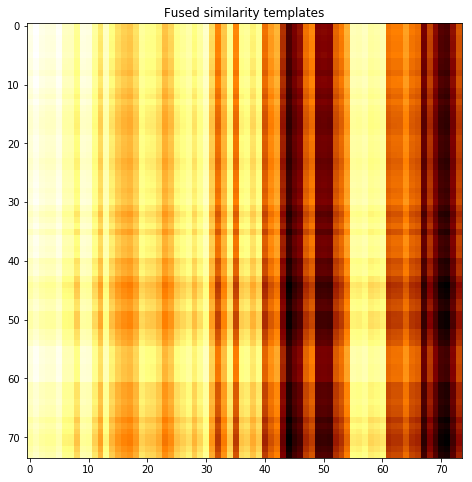

subject 12; gesture 1_0_2


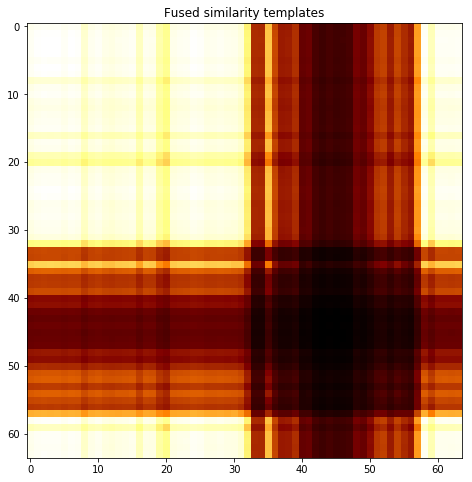

subject 19; gesture 1_1_2


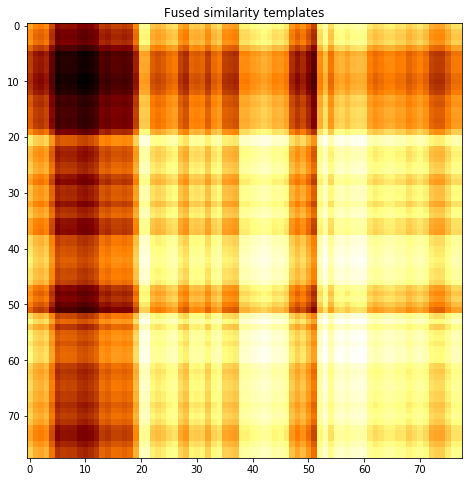

subject 19; gesture 1_1_1


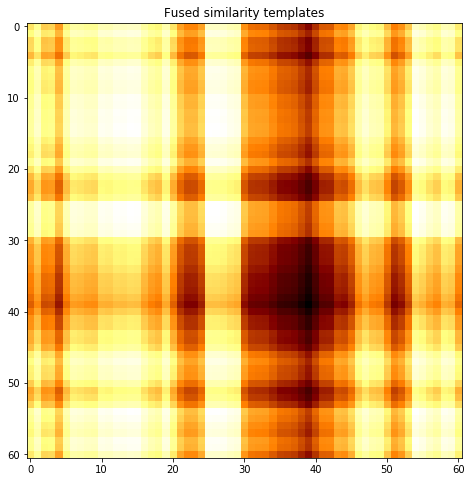

subject 19; gesture 1_0_1


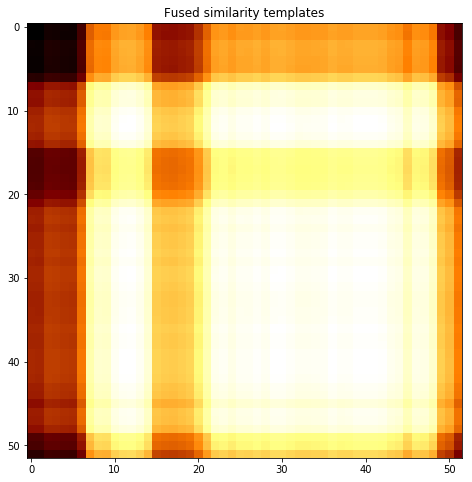

subject 19; gesture 1_0_2


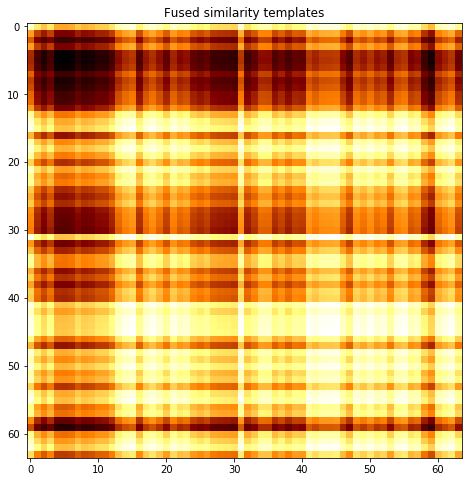

subject 07; gesture 1_1_2


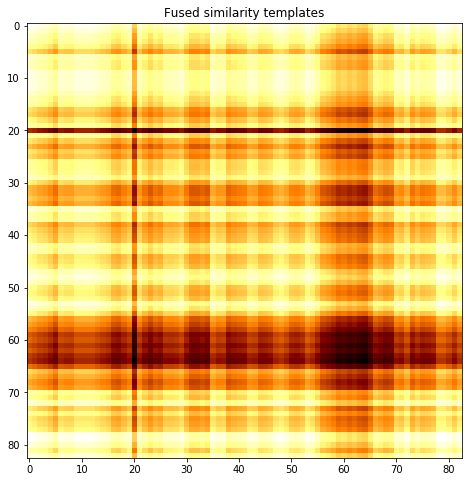

subject 07; gesture 1_1_1


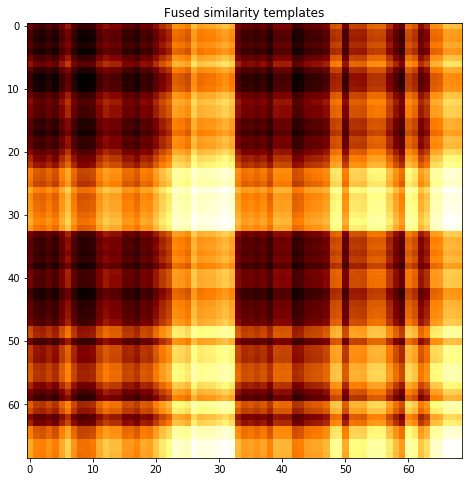

subject 07; gesture 1_0_1


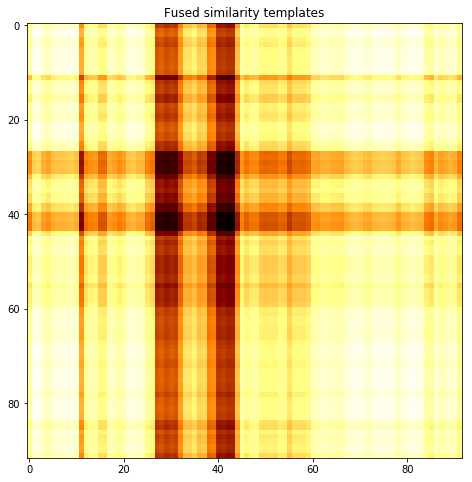

subject 07; gesture 1_0_2


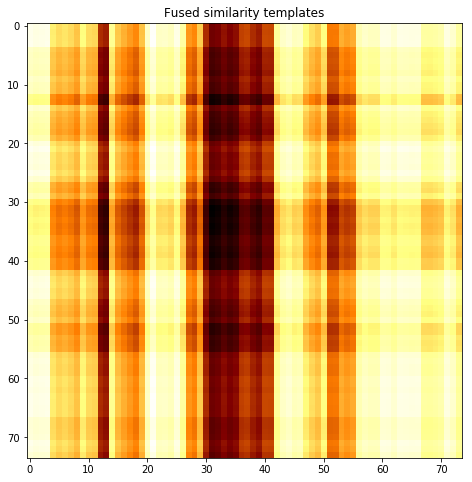

subject 20; gesture 1_1_2


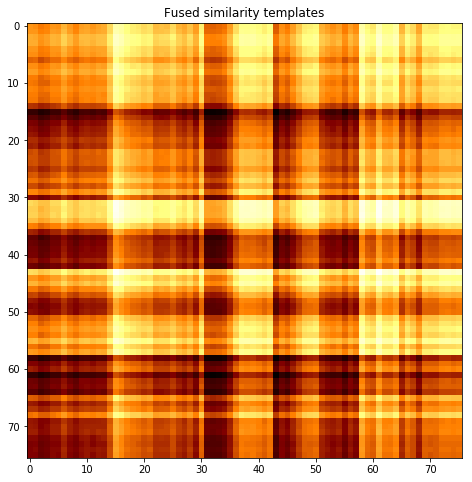

subject 20; gesture 1_1_1


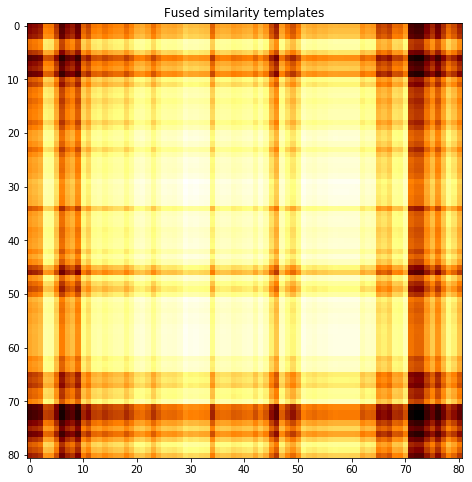

subject 20; gesture 1_0_1


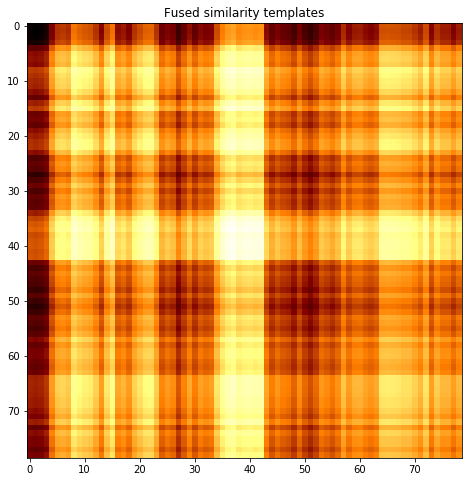

subject 20; gesture 1_0_2


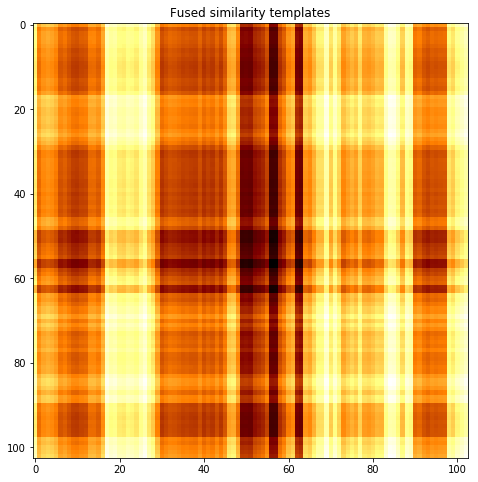

subject 31; gesture 1_1_2


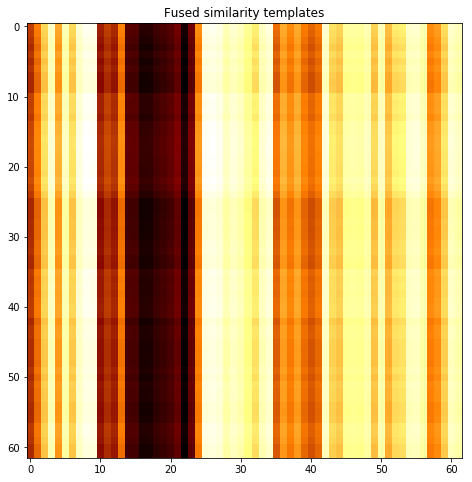

subject 31; gesture 1_1_1


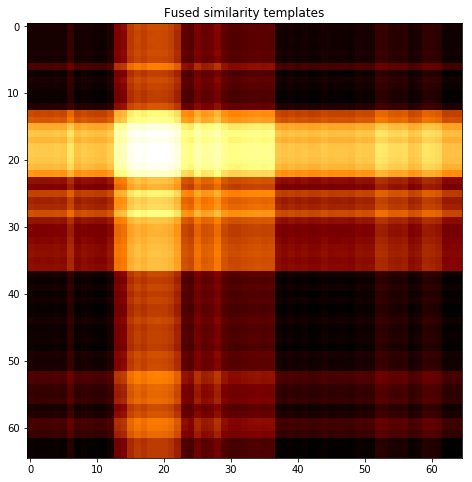

subject 31; gesture 1_0_1


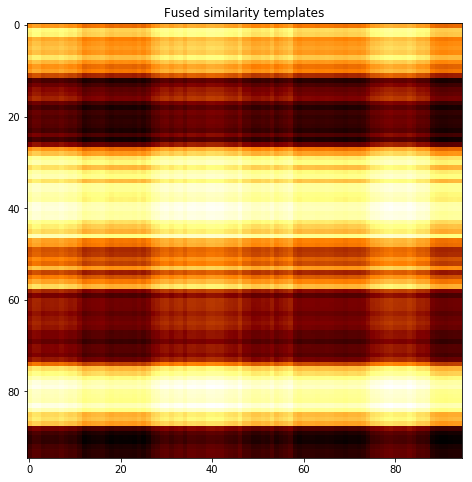

subject 31; gesture 1_0_2


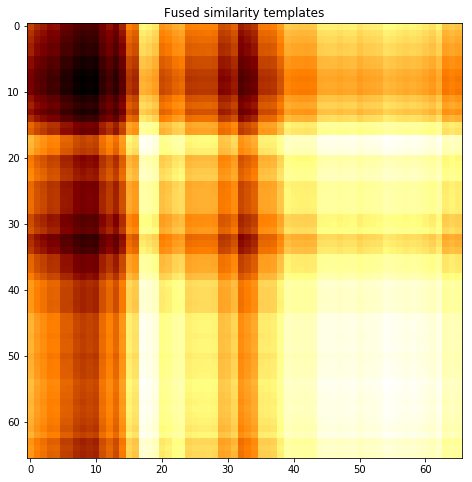

subject 13; gesture 1_1_2


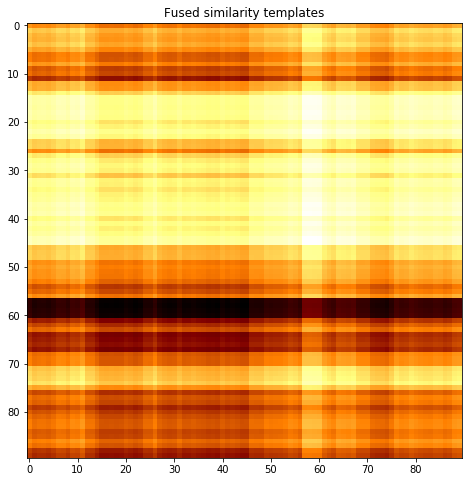

subject 13; gesture 1_1_1


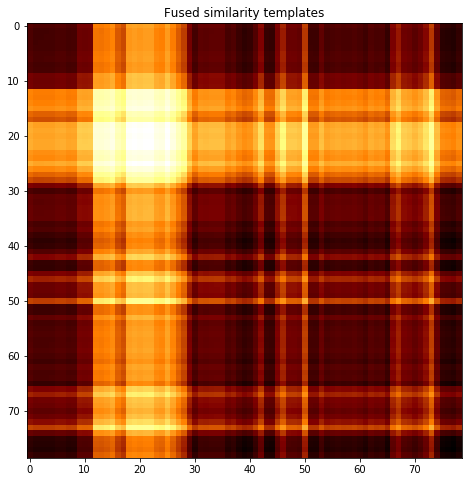

subject 13; gesture 1_0_1


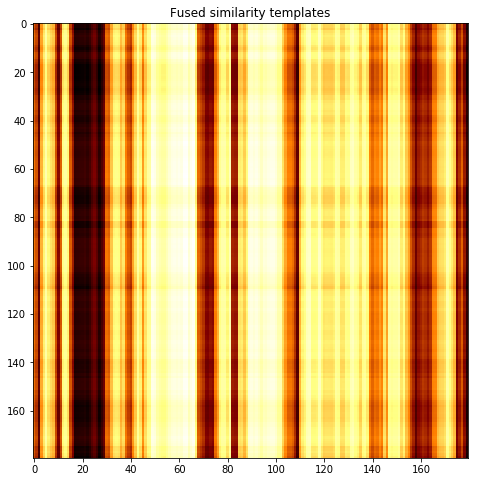

subject 13; gesture 1_0_2


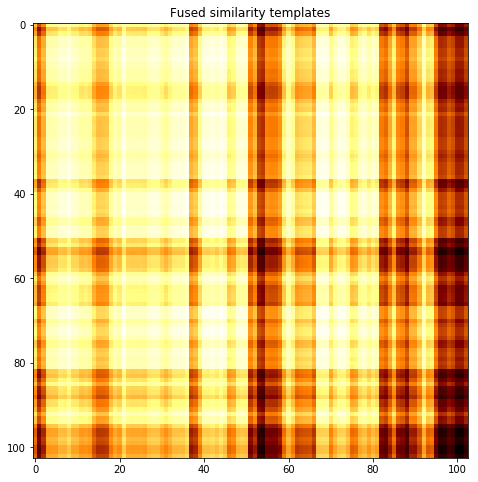

subject 36; gesture 1_1_2


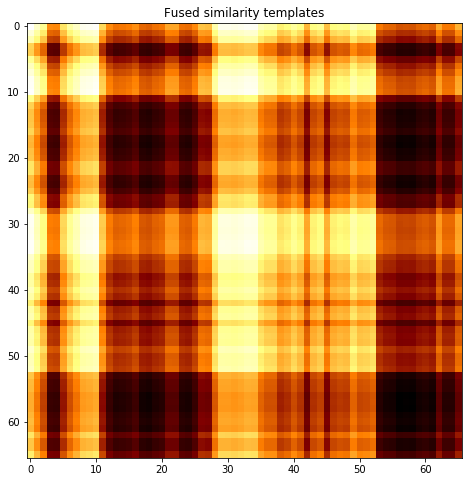

subject 36; gesture 1_1_1


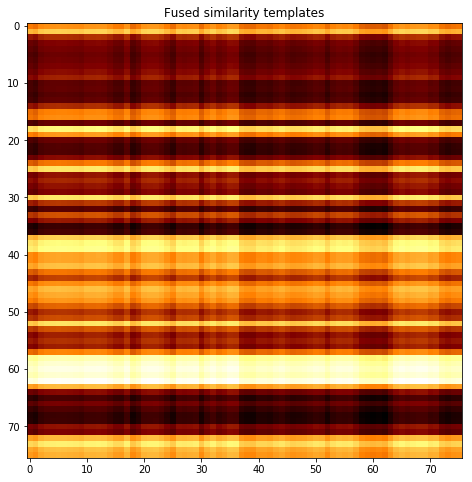

subject 36; gesture 1_0_1


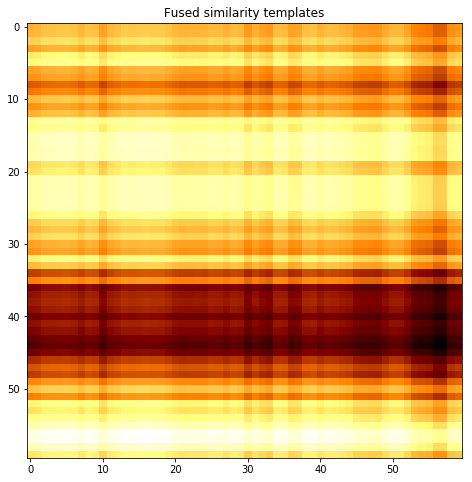

subject 36; gesture 1_0_2


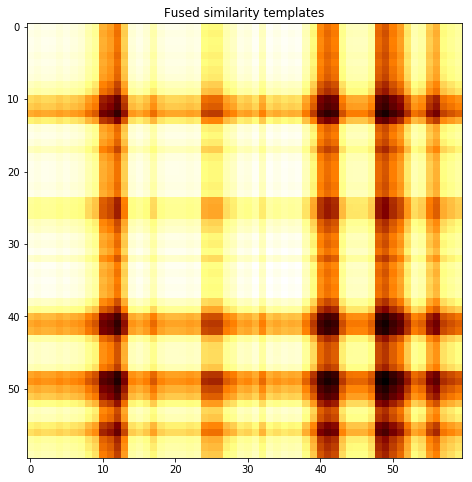

subject 24; gesture 1_1_2


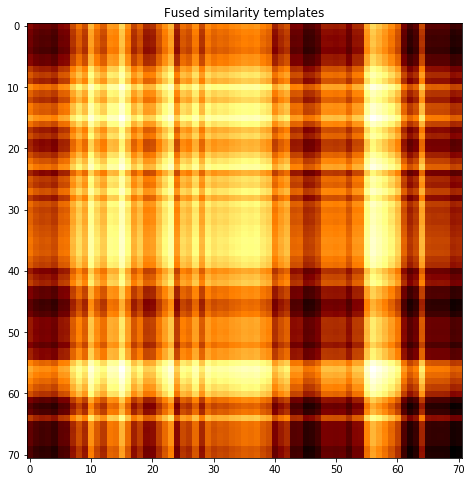

subject 24; gesture 1_1_1


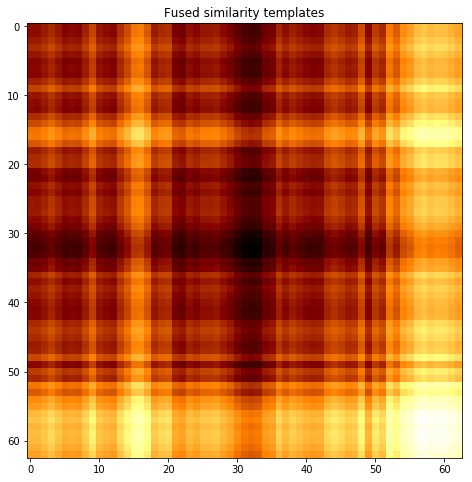

subject 24; gesture 1_0_1


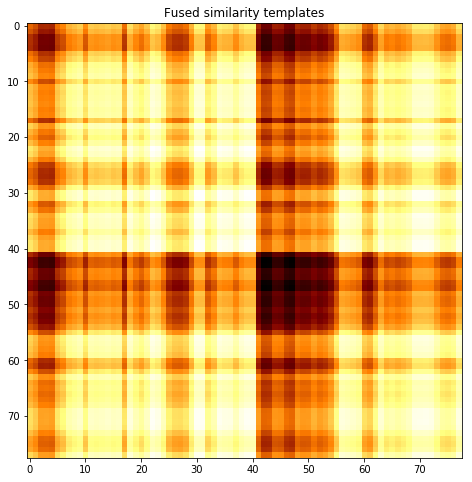

subject 24; gesture 1_0_2


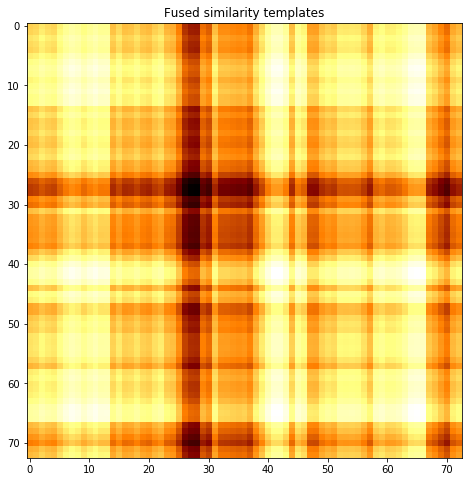

subject 33; gesture 1_1_2


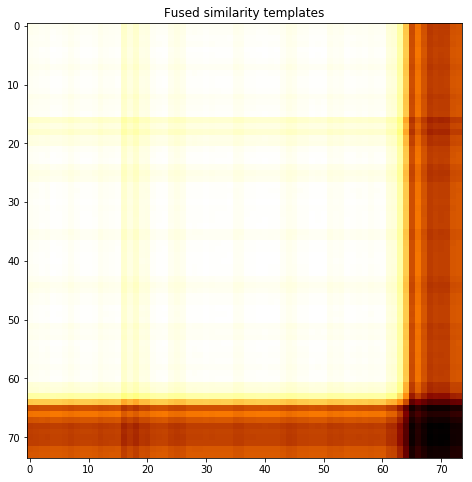

subject 33; gesture 1_1_1


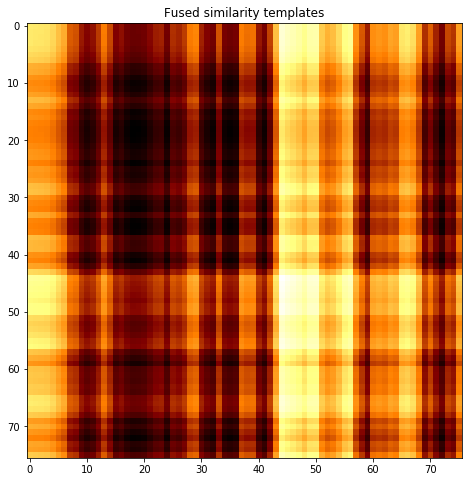

subject 33; gesture 1_0_1


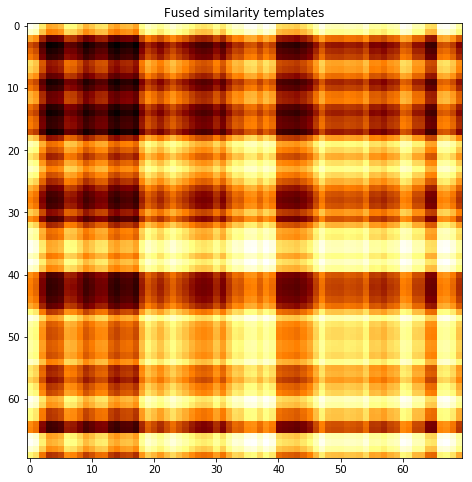

subject 33; gesture 1_0_2


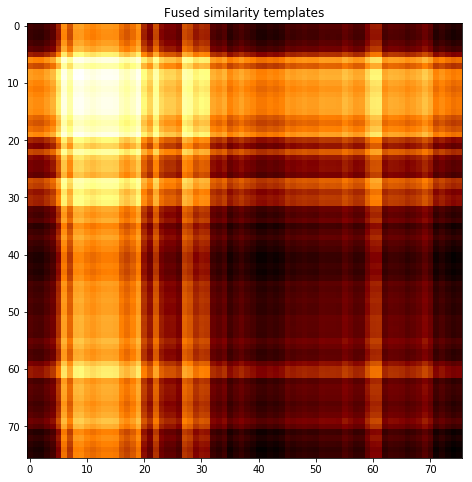

subject 11; gesture 1_1_2


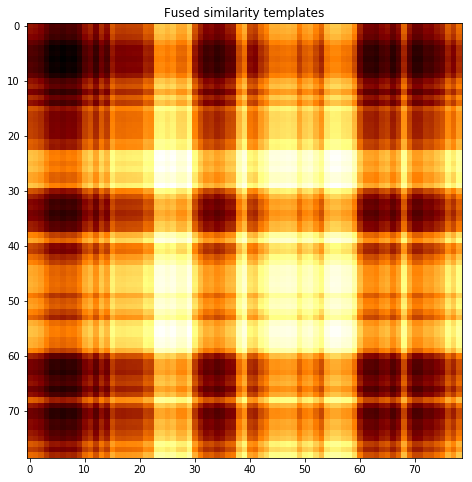

subject 11; gesture 1_1_1


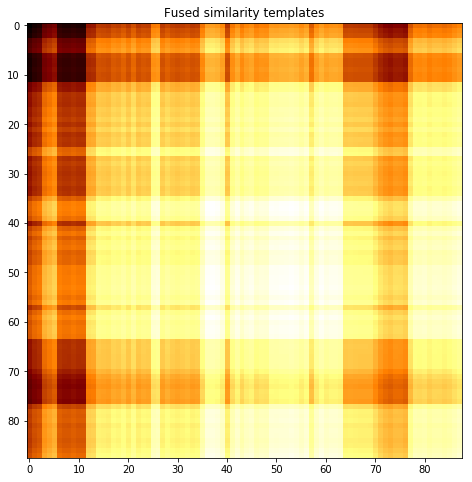

subject 11; gesture 1_0_1


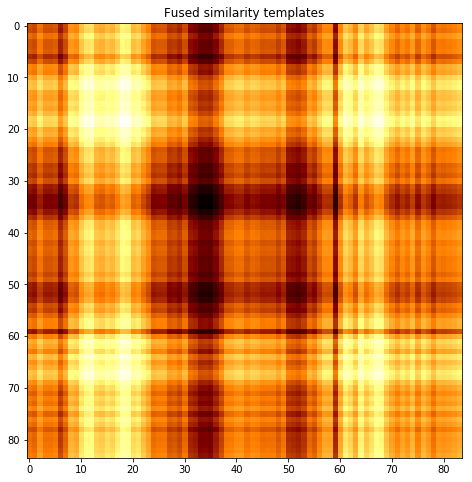

subject 11; gesture 1_0_2


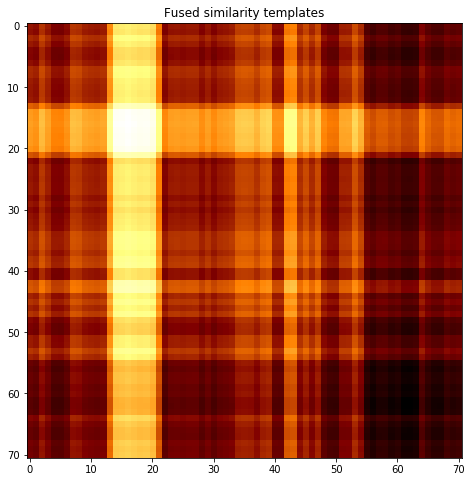

subject 35; gesture 1_1_2


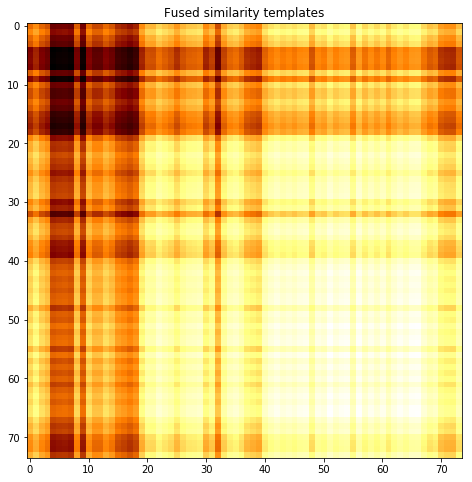

subject 35; gesture 1_1_1


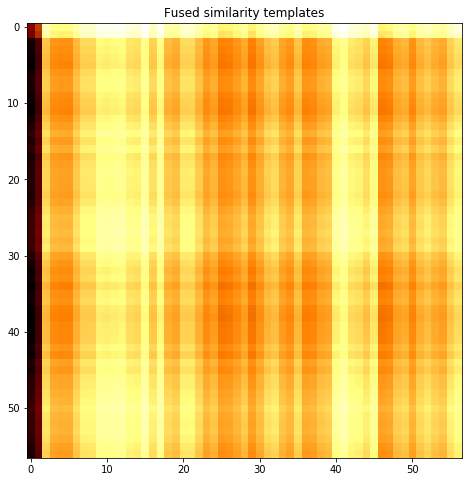

subject 35; gesture 1_0_1


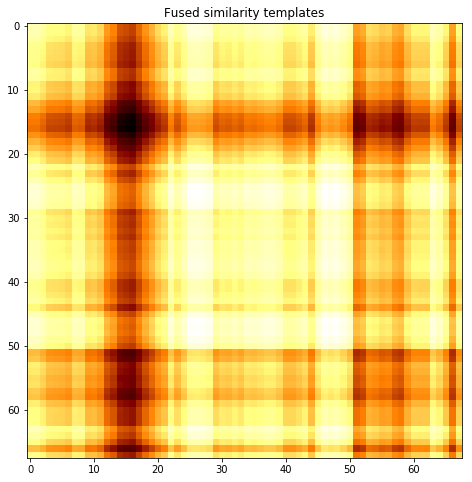

subject 35; gesture 1_0_2


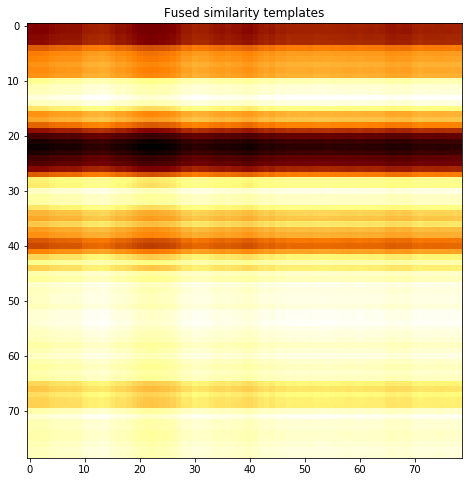

subject 22; gesture 1_1_2


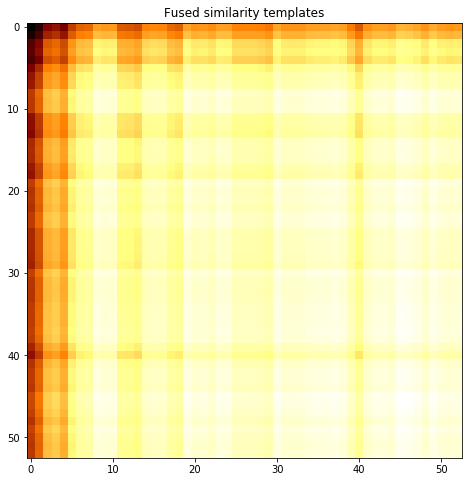

subject 22; gesture 1_1_1


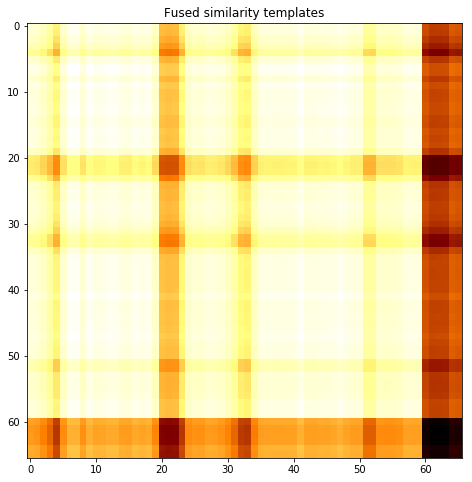

subject 22; gesture 1_0_1


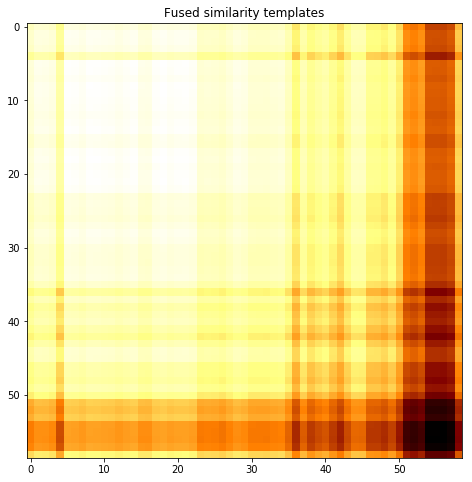

subject 22; gesture 1_0_2


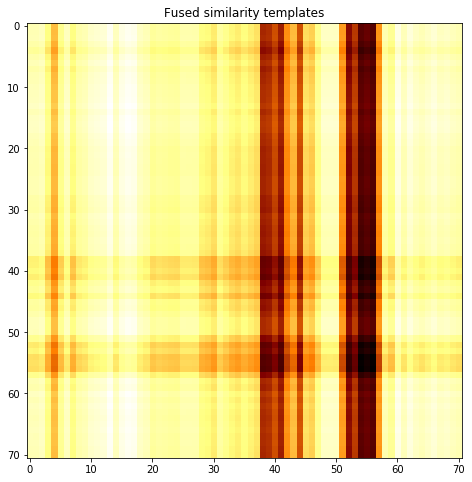

subject 34; gesture 1_1_2


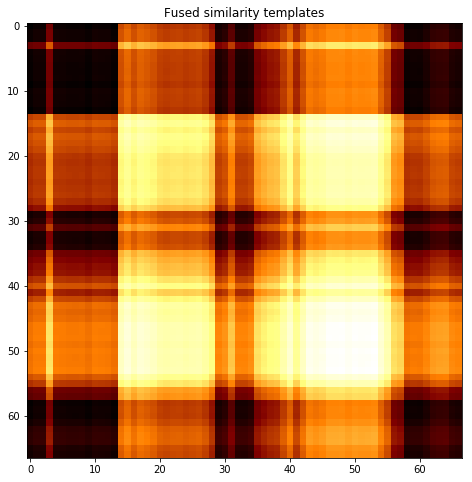

subject 34; gesture 1_1_1


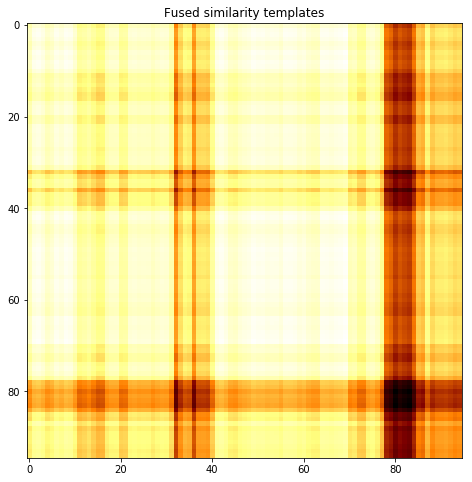

subject 34; gesture 1_0_1


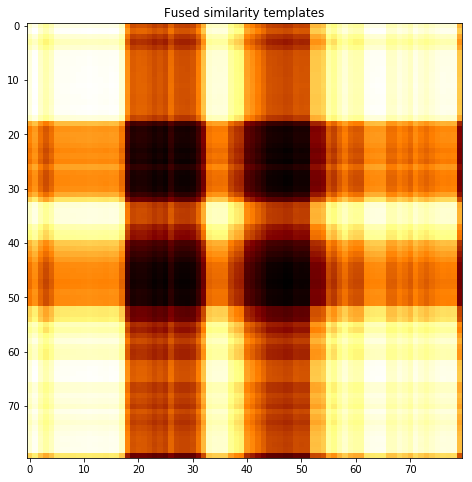

subject 34; gesture 1_0_2


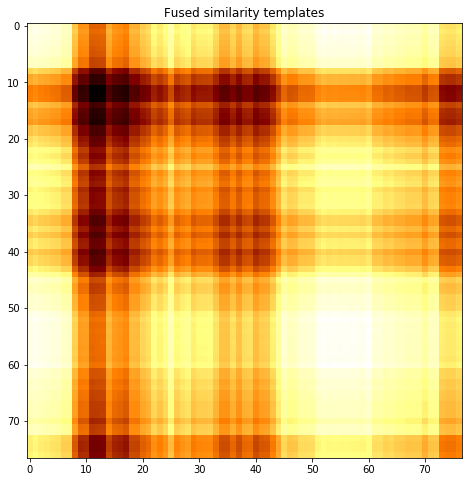

subject 10; gesture 1_1_2


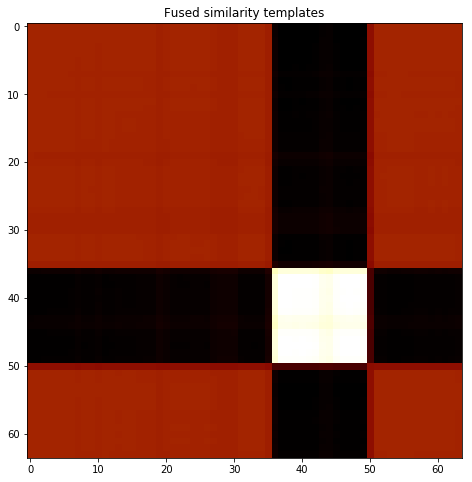

subject 10; gesture 1_1_1


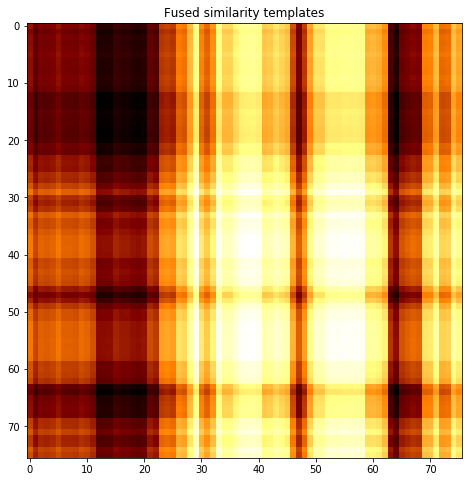

subject 10; gesture 1_0_1


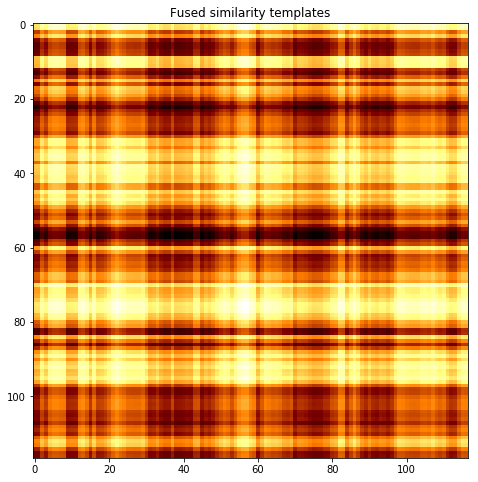

subject 10; gesture 1_0_2


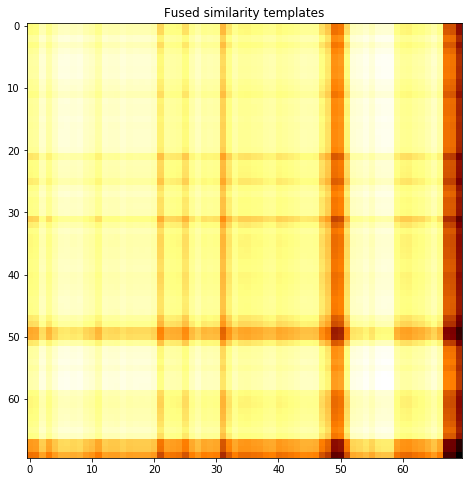

subject 02; gesture 1_1_2


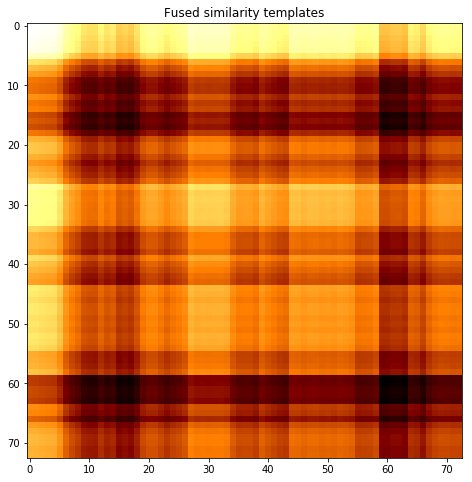

subject 02; gesture 1_1_1


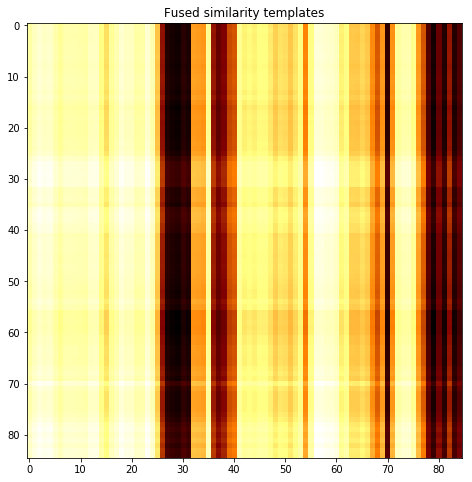

subject 02; gesture 1_0_1


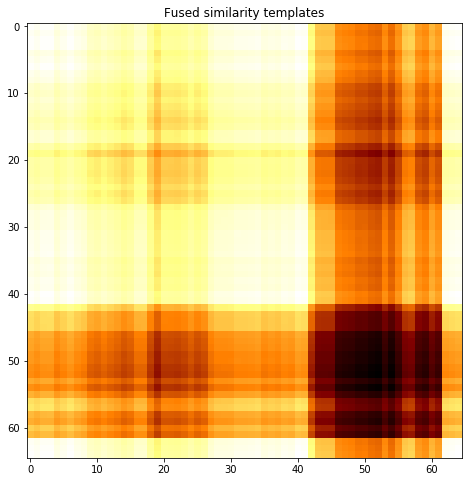

subject 02; gesture 1_0_2


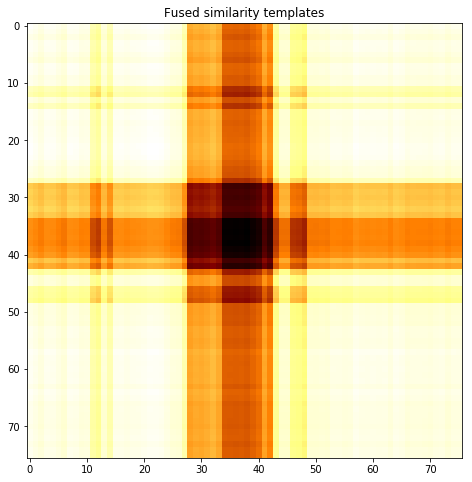

In [4]:
g1_dict_synerg = {}
for s, gdict in dc.data_set_smooth.items():
    g1_dict_synerg[s] = {}
    for g, a in gdict.items():
        snf = SNF(dc.data_set_smooth[s][g][:, :-1], k=0.2)
        # calculate graph weights to find knn
        snf.calc_weights()
        snf.normalize_weights()
        # generate and normalize knn graphs
        snf.calc_knn_weights()
        snf.normalize_knn_weights()
        # fuse graphs
        snf.network_fusion(iters=20)
        print(f"subject {s}; gesture {g}")
        snf.plot_template()
        # save template to dict
        g1_dict_synerg[s][g] = snf.fused_similarity_template

---

static w/ 25 iters

subject 05; gesture 1_0_1

subject 23; gesture 1_1_2

subject 25; gesture 1_0_1

subject 29; gesture 1_1_1

subject 12; gesture 1_1_2

subject 31; gesture 1_1_2

subject 24; gesture 1_1_1

Problem cases w/ 20 iters: \
subject 21; gesture 1_0_1 \
subject 21; gesture 1_1_2 \
subject 01; gesture 1_1_1\
subject 01; gesture 1_0_2

---

Goal: find differences between "static-y" fused SSMs and "smooth" fused SSMs


Observations:
 - SSMs with a lot of static have very low st. dev.; All elements very similar.
 - SSMs with higher st. dev. have more obvious/ bold features.
 - some exceptions exist (e.g. subject 02 gesture 1_1_1 - still a lot of static but a bold feature exists)

---
Can I do PCA for all of these and get similar results?

subject 30; gesture 1_1_2; avg 0.011714664436691662; sd 3.2760311863849765e-11
subject 30; gesture 1_1_2; PoV: 0.9999999999999993


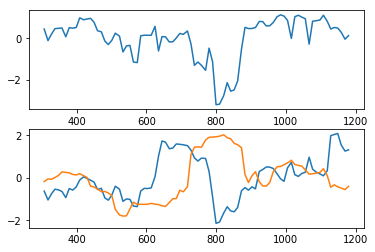

subject 30; gesture 1_1_1; avg 0.011656603135482557; sd 1.9229996697625934e-09
subject 30; gesture 1_1_1; PoV: 0.999999999987568


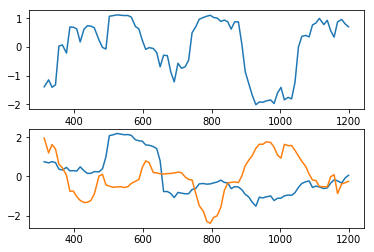

subject 30; gesture 1_0_1; avg 0.01068644948549988; sd 2.8289931877102784e-14
subject 30; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


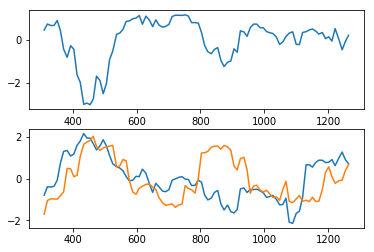

subject 30; gesture 1_0_2; avg 0.013068691207850749; sd 1.3041147624000932e-05
subject 30; gesture 1_0_2; PoV: 0.9996080193571999


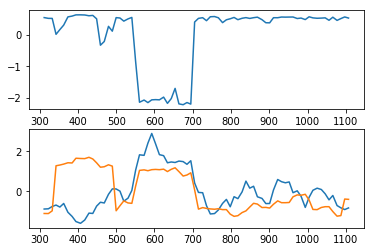

subject 06; gesture 1_1_2; avg 0.026687466794939798; sd 4.905921222998014e-07
subject 06; gesture 1_1_2; PoV: 0.9999999441400625


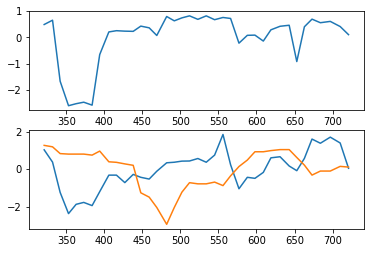

subject 06; gesture 1_1_1; avg 0.013486950245894842; sd 1.1456209608828595e-10
subject 06; gesture 1_1_1; PoV: 0.9999999999998771


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


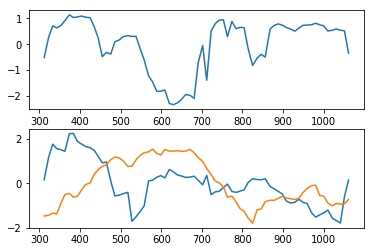

subject 06; gesture 1_0_1; avg 0.014975642801242868; sd 1.0403828827162018e-11
subject 06; gesture 1_0_1; PoV: 0.9999999999999998


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


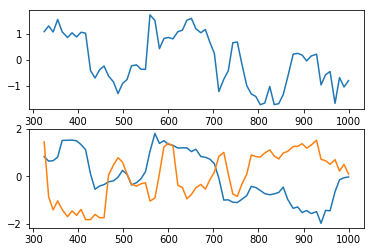

subject 06; gesture 1_0_2; avg 0.018600933540702233; sd 2.1372079620249511e-10
subject 06; gesture 1_0_2; PoV: 0.9999999999996317


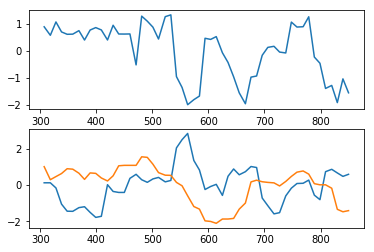

subject 09; gesture 1_1_2; avg 0.013773406654899449; sd 1.3498451511161451e-11
subject 09; gesture 1_1_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


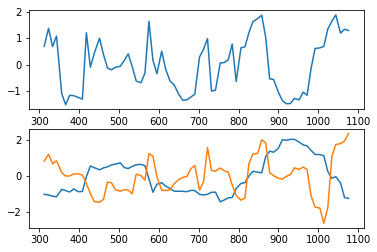

subject 09; gesture 1_1_1; avg 0.015590735783670765; sd 0.00011219819157537506
subject 09; gesture 1_1_1; PoV: 0.9961504644745083


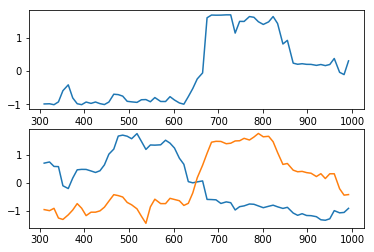

subject 09; gesture 1_0_1; avg 0.011653217915943365; sd 6.115570322773867e-07
subject 09; gesture 1_0_1; PoV: 0.9999851399228442


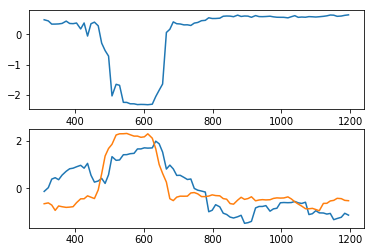

subject 09; gesture 1_0_2; avg 0.01443277739604514; sd 4.071212593967803e-12
subject 09; gesture 1_0_2; PoV: 1.0000000000000002


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


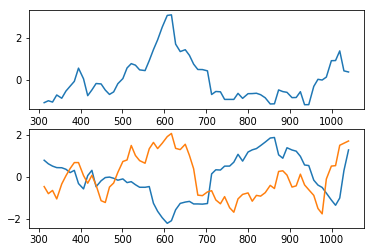

subject 03; gesture 1_1_2; avg 0.013254878335830774; sd 2.343320993172153e-09
subject 03; gesture 1_1_2; PoV: 0.9999999999966157


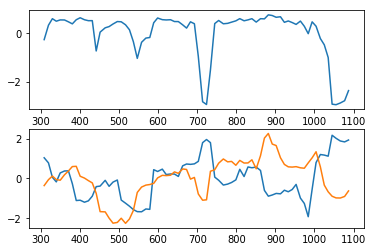

subject 03; gesture 1_1_1; avg 0.01835809474475241; sd 8.663763277775425e-09
subject 03; gesture 1_1_1; PoV: 0.999999999948188


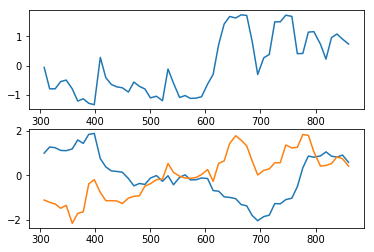

subject 03; gesture 1_0_1; avg 0.014188780747217548; sd 1.4669533792665521e-09
subject 03; gesture 1_0_1; PoV: 0.9999999999989019


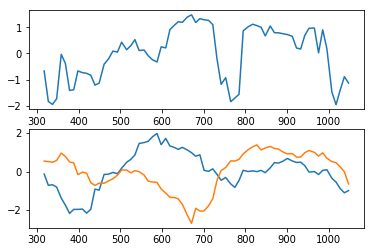

subject 03; gesture 1_0_2; avg 0.015998386655238003; sd 3.0672163120417345e-12
subject 03; gesture 1_0_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


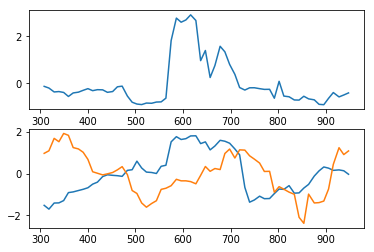

subject 05; gesture 1_1_2; avg 0.018106583025000334; sd 3.3673262192966974e-09
subject 05; gesture 1_1_2; PoV: 0.9999999999981399


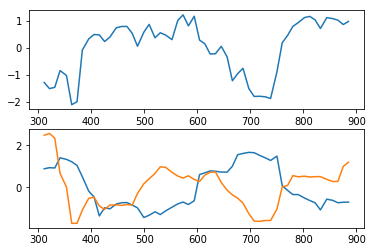

subject 05; gesture 1_1_1; avg 0.017981916402367043; sd 5.253718929861205e-09
subject 05; gesture 1_1_1; PoV: 0.9999999998995204


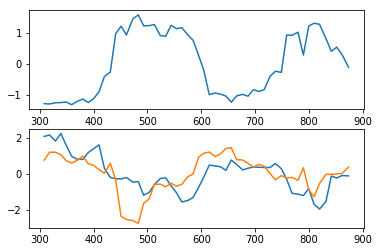

subject 05; gesture 1_0_1; avg 0.01140687669266488; sd 2.8110988488107442e-12
subject 05; gesture 1_0_1; PoV: 0.9999999999999998


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


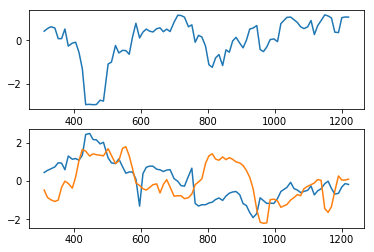

subject 05; gesture 1_0_2; avg 0.014862651312603569; sd 3.497682318282337e-15
subject 05; gesture 1_0_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


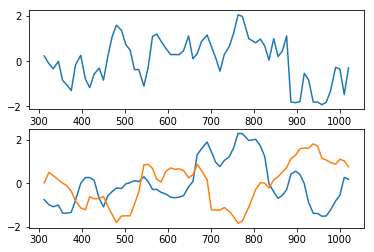

subject 21; gesture 1_1_2; avg 0.013799157230165856; sd 2.3542879030214823e-13
subject 21; gesture 1_1_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


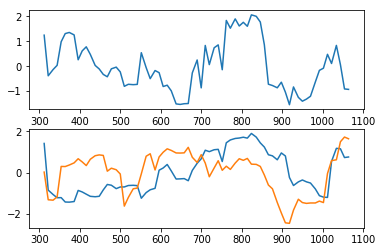

subject 21; gesture 1_1_1; avg 0.016085734374353886; sd 0.0007735382271635755
subject 21; gesture 1_1_1; PoV: 0.9535924962987194


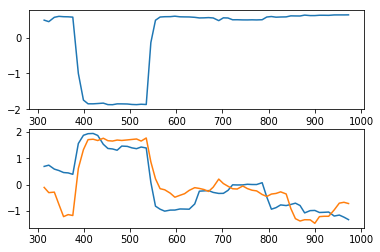

subject 21; gesture 1_0_1; avg 0.016849540130980268; sd 4.804968106755646e-12
subject 21; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


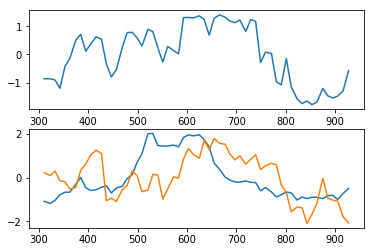

subject 21; gesture 1_0_2; avg 0.01719648484840379; sd 5.235829118610349e-11
subject 21; gesture 1_0_2; PoV: 0.9999999999999937


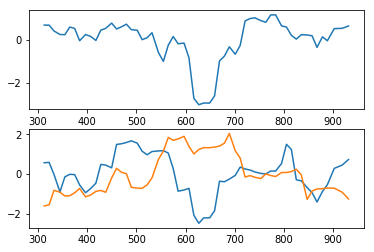

subject 17; gesture 1_1_2; avg 0.013517810799794855; sd 1.71885175023704e-13
subject 17; gesture 1_1_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


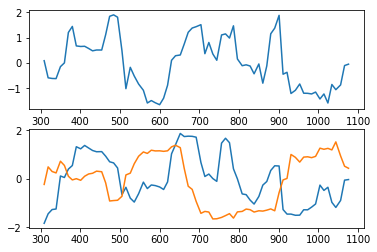

subject 17; gesture 1_1_1; avg 0.01605654466554346; sd 8.771151198787189e-13
subject 17; gesture 1_1_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


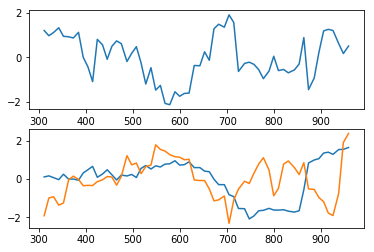

subject 17; gesture 1_0_1; avg 0.014144314405948669; sd 4.0372833072027986e-13
subject 17; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


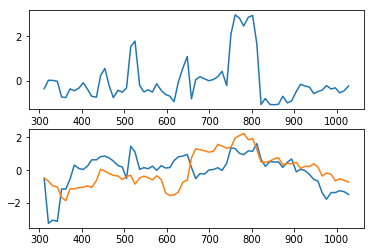

subject 17; gesture 1_0_2; avg 0.01618821941098063; sd 1.6083642633793796e-13
subject 17; gesture 1_0_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


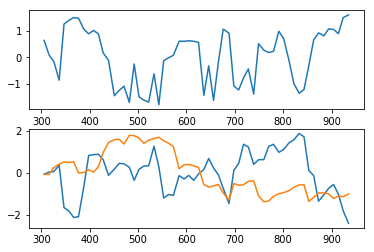

subject 01; gesture 1_1_2; avg 0.015371028636002171; sd 3.675906955406265e-09
subject 01; gesture 1_1_2; PoV: 0.9999999999720092


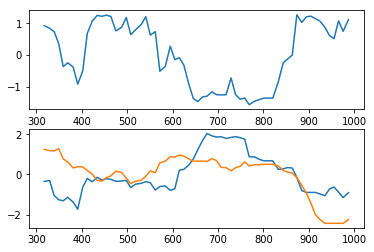

subject 01; gesture 1_1_1; avg 0.014602575744373408; sd 2.9442224294435396e-13
subject 01; gesture 1_1_1; PoV: 1.0000000000000002


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


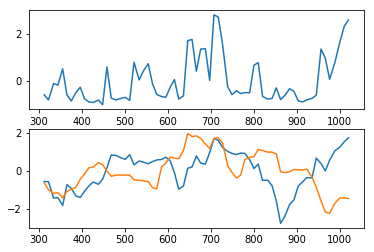

subject 01; gesture 1_0_1; avg 0.010996102495446473; sd 4.219343432705986e-16
subject 01; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


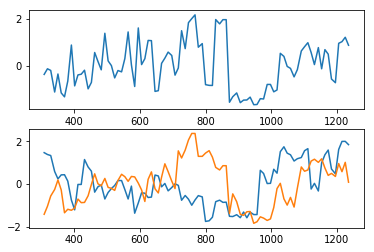

subject 01; gesture 1_0_2; avg 0.012229917486004254; sd 2.0033305897175747e-13
subject 01; gesture 1_0_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


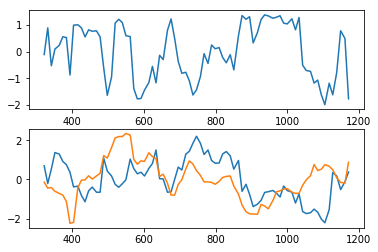

subject 16; gesture 1_1_2; avg 0.01930356318740207; sd 2.0257719787064864e-13
subject 16; gesture 1_1_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


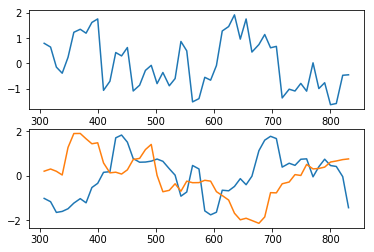

subject 16; gesture 1_1_1; avg 0.013592767958083417; sd 4.045400062650411e-09
subject 16; gesture 1_1_1; PoV: 0.9999999999877119


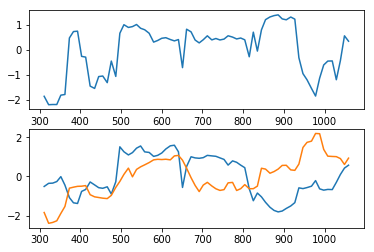

subject 16; gesture 1_0_1; avg 0.022087204505685545; sd 1.6048339437895664e-09
subject 16; gesture 1_0_1; PoV: 0.999999999999865


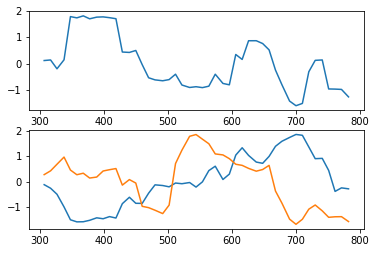

subject 16; gesture 1_0_2; avg 0.017974488462623634; sd 3.4051588086086606e-11
subject 16; gesture 1_0_2; PoV: 0.9999999999999987


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


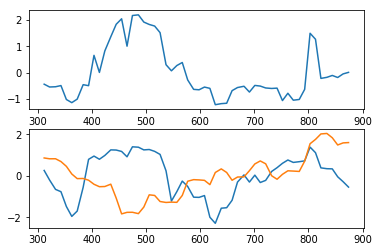

subject 26; gesture 1_1_2; avg 0.0179449508926611; sd 4.5852548686078214e-15
subject 26; gesture 1_1_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


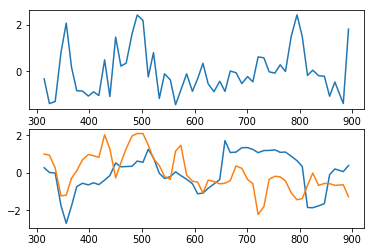

subject 26; gesture 1_1_1; avg 0.018013072785087385; sd 1.130632451636859e-07
subject 26; gesture 1_1_1; PoV: 0.9999999590041588


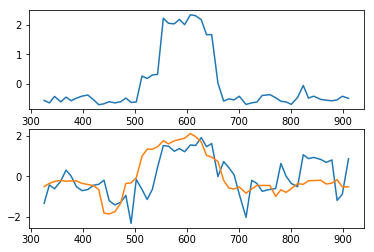

subject 26; gesture 1_0_1; avg 0.005025702296073817; sd 1.2436997437333564e-16
subject 26; gesture 1_0_1; PoV: 1.0000000000000002


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


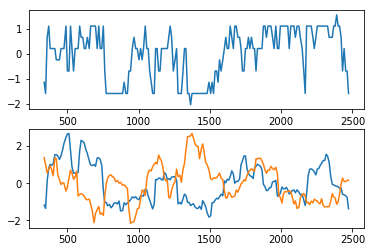

subject 26; gesture 1_0_2; avg 0.015008671199008065; sd 9.87398764491359e-10
subject 26; gesture 1_0_2; PoV: 0.9999999999983376


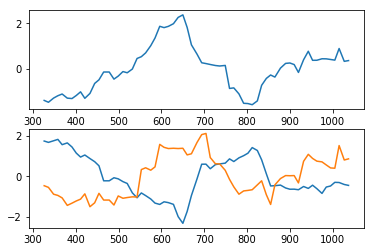

subject 32; gesture 1_1_2; avg 0.01283592269361995; sd 7.980461131501053e-09
subject 32; gesture 1_1_2; PoV: 0.9999999998289337


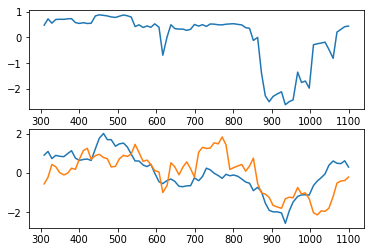

subject 32; gesture 1_1_1; avg 0.014861962412015635; sd 2.296133010516186e-07
subject 32; gesture 1_1_1; PoV: 0.9999999618672257


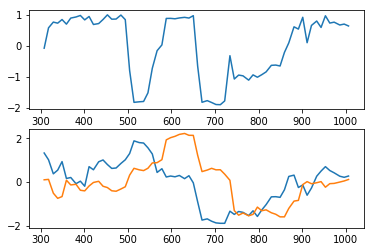

subject 32; gesture 1_0_1; avg 0.014408090267731556; sd 5.606785469219596e-07
subject 32; gesture 1_0_1; PoV: 0.9999995966374484


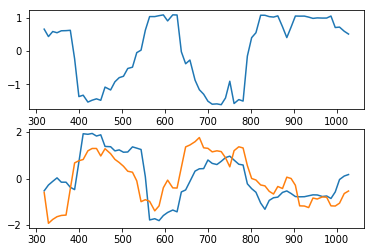

subject 32; gesture 1_0_2; avg 0.01707843226968545; sd 2.0886648352383726e-09
subject 32; gesture 1_0_2; PoV: 0.9999999999724969


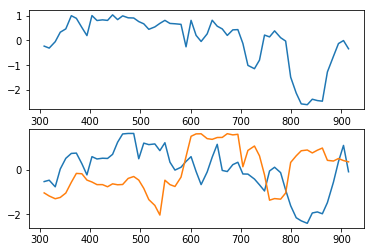

subject 04; gesture 1_1_2; avg 0.013897042804776981; sd 4.7466593964185906e-08
subject 04; gesture 1_1_2; PoV: 0.9999999989535016


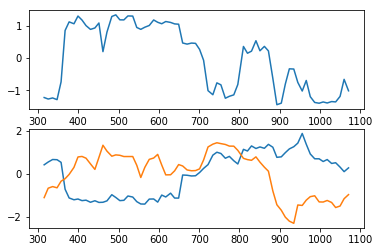

subject 04; gesture 1_1_1; avg 0.014542008935963038; sd 1.626475640222606e-10
subject 04; gesture 1_1_1; PoV: 0.9999999999999478


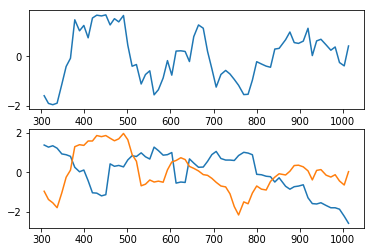

subject 04; gesture 1_0_1; avg 0.01701464987539571; sd 6.9806720247507076e-12
subject 04; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


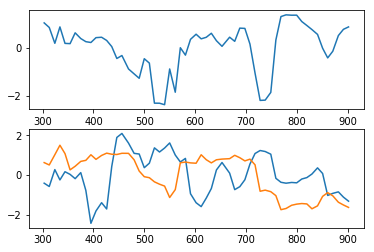

subject 04; gesture 1_0_2; avg 0.01576817588916402; sd 6.761302137537449e-12
subject 04; gesture 1_0_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


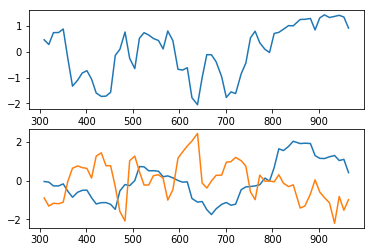

subject 08; gesture 1_1_2; avg 0.013533873196232435; sd 1.0691821206922863e-08
subject 08; gesture 1_1_2; PoV: 0.9999999998047918


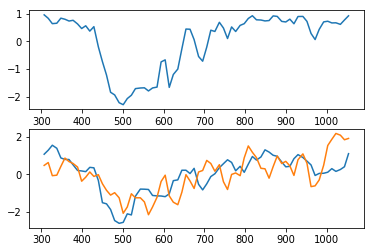

subject 08; gesture 1_1_1; avg 0.016269003130730396; sd 7.060902239946325e-09
subject 08; gesture 1_1_1; PoV: 0.9999999999765343


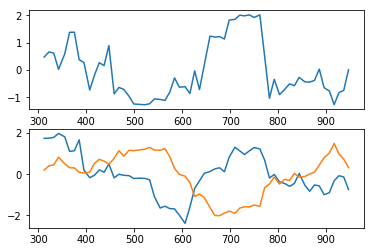

subject 08; gesture 1_0_1; avg 0.015009527681294215; sd 1.8042607976718902e-16
subject 08; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


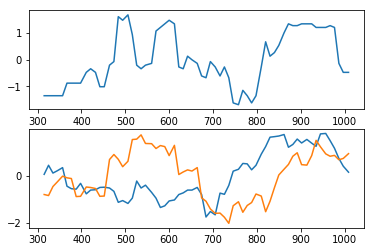

subject 08; gesture 1_0_2; avg 0.016188709558975632; sd 1.0455031278635433e-10
subject 08; gesture 1_0_2; PoV: 0.9999999999999927


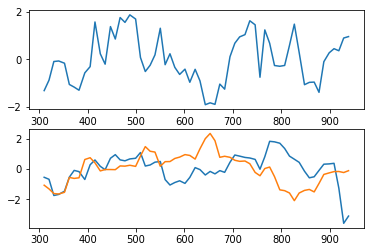

subject 27; gesture 1_1_2; avg 0.014398444490388133; sd 2.3389171173110757e-09
subject 27; gesture 1_1_2; PoV: 0.9999999999969459


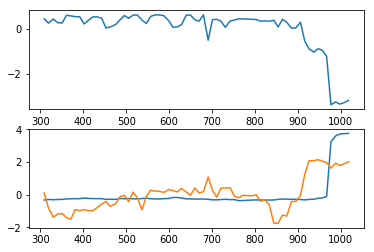

subject 27; gesture 1_1_1; avg 0.010472032540953101; sd 1.4751941718972486e-11
subject 27; gesture 1_1_1; PoV: 0.9999999999999861


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


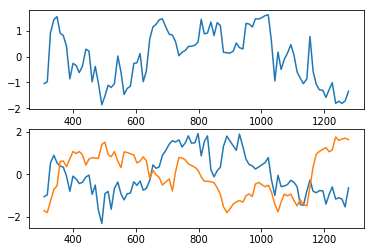

subject 27; gesture 1_0_1; avg 0.015234557688822948; sd 3.19335278721226e-08
subject 27; gesture 1_0_1; PoV: 0.9999999999322771


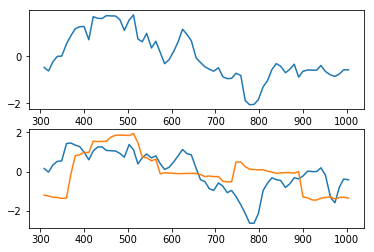

subject 27; gesture 1_0_2; avg 0.015426554313967887; sd 2.0430123150737666e-14
subject 27; gesture 1_0_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


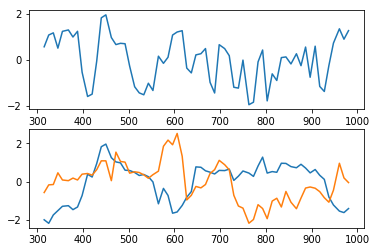

subject 14; gesture 1_1_2; avg 0.013357504088622; sd 1.0489042815157735e-13
subject 14; gesture 1_1_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


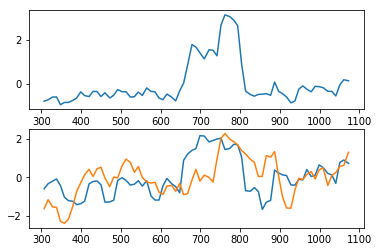

subject 14; gesture 1_1_1; avg 0.01968492186179546; sd 3.5113418333067276e-11
subject 14; gesture 1_1_1; PoV: 0.9999999999999911


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


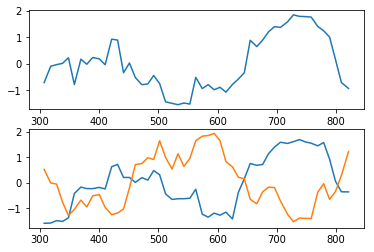

subject 14; gesture 1_0_1; avg 0.012730396414542697; sd 6.388145424691973e-06
subject 14; gesture 1_0_1; PoV: 0.9999721560593162


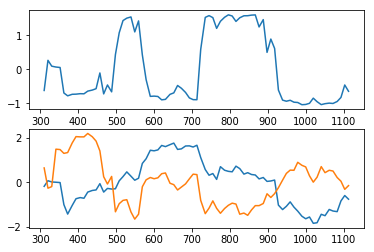

subject 14; gesture 1_0_2; avg 0.014446876475909304; sd 1.3556807918062918e-07
subject 14; gesture 1_0_2; PoV: 0.9999999884115782


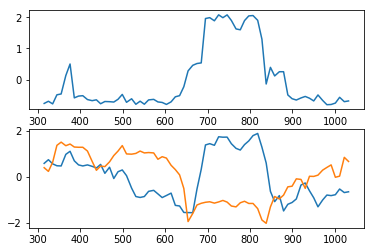

subject 23; gesture 1_1_2; avg 0.013006329365160508; sd 1.2535258754056556e-12
subject 23; gesture 1_1_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


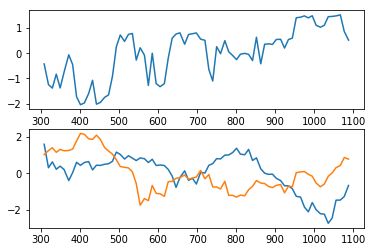

subject 23; gesture 1_1_1; avg 0.011962739051287448; sd 1.3956638447178519e-08
subject 23; gesture 1_1_1; PoV: 0.9999999999542808


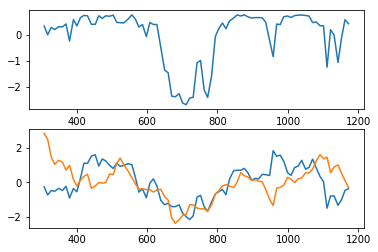

subject 23; gesture 1_0_1; avg 0.011964926637438892; sd 2.2077565697745652e-14
subject 23; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


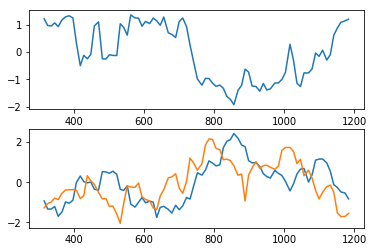

subject 23; gesture 1_0_2; avg 0.014362638034510608; sd 3.014841337559153e-10
subject 23; gesture 1_0_2; PoV: 0.9999999999998977


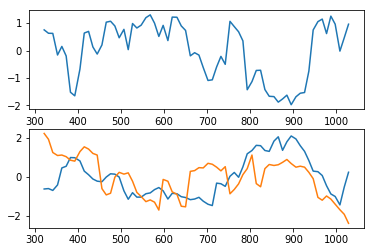

subject 25; gesture 1_1_2; avg 0.015941955483246003; sd 1.8835943598982982e-12
subject 25; gesture 1_1_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


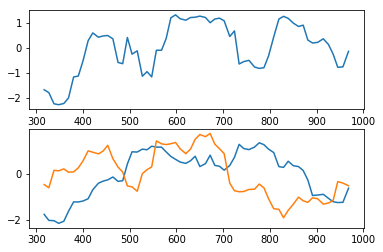

subject 25; gesture 1_1_1; avg 0.012133282076713409; sd 1.843606366024214e-15
subject 25; gesture 1_1_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


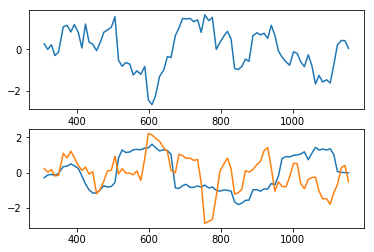

subject 25; gesture 1_0_1; avg 0.015024752870990244; sd 6.273944507273263e-10
subject 25; gesture 1_0_1; PoV: 0.9999999999989485


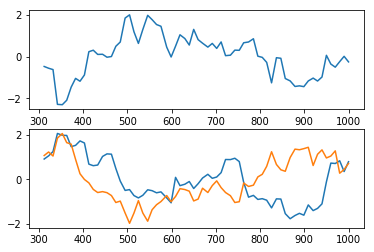

subject 25; gesture 1_0_2; avg 0.016404981527124964; sd 3.6332120767182395e-07
subject 25; gesture 1_0_2; PoV: 0.999999935209286


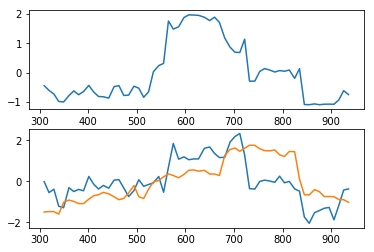

subject 18; gesture 1_1_2; avg 0.01253552001980561; sd 6.257430661374013e-13
subject 18; gesture 1_1_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


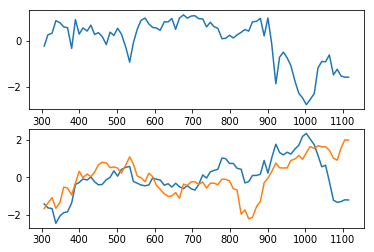

subject 18; gesture 1_1_1; avg 0.013083989291958972; sd 3.5740049119523986e-09
subject 18; gesture 1_1_1; PoV: 0.9999999999958635


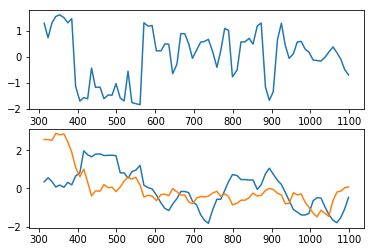

subject 18; gesture 1_0_1; avg 0.01974985882973755; sd 0.00023842309957445367
subject 18; gesture 1_0_1; PoV: 0.9985851303883041


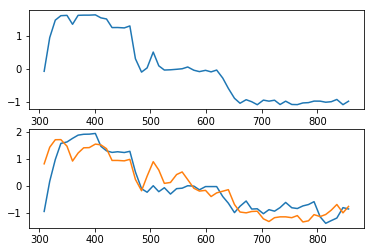

subject 18; gesture 1_0_2; avg 0.01237472037862174; sd 1.0743589601846853e-15
subject 18; gesture 1_0_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


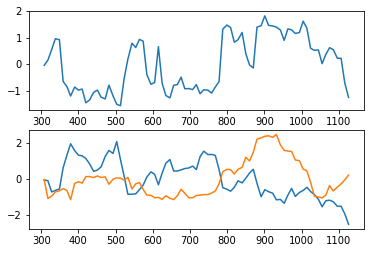

subject 29; gesture 1_1_2; avg 0.015378134634068563; sd 2.552620676923886e-09
subject 29; gesture 1_1_2; PoV: 0.9999999999983916


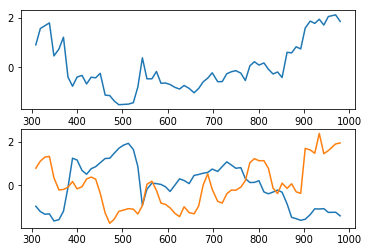

subject 29; gesture 1_1_1; avg 0.018007896122754816; sd 1.474182749516861e-05
subject 29; gesture 1_1_1; PoV: 0.9999015863060975


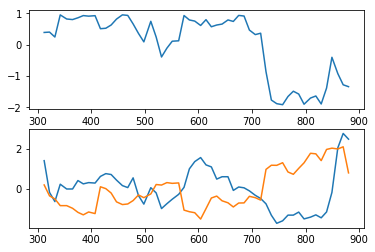

subject 29; gesture 1_0_1; avg 0.015000821164827328; sd 6.48022690535979e-13
subject 29; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


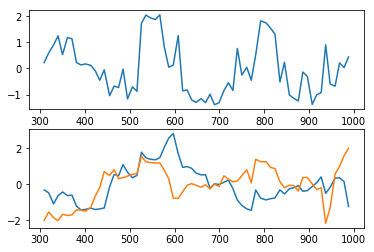

subject 29; gesture 1_0_2; avg 0.014636351086286425; sd 5.678786182083343e-11
subject 29; gesture 1_0_2; PoV: 0.9999999999999881


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


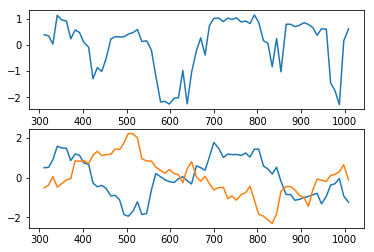

subject 15; gesture 1_1_2; avg 0.012436462406724101; sd 3.7566307429279046e-13
subject 15; gesture 1_1_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


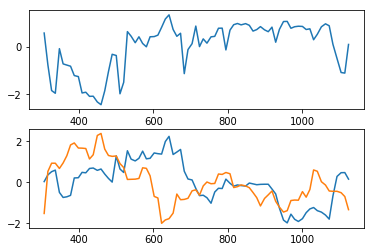

subject 15; gesture 1_1_1; avg 0.01592524039735628; sd 9.124554534980044e-13
subject 15; gesture 1_1_1; PoV: 0.9999999999999998


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


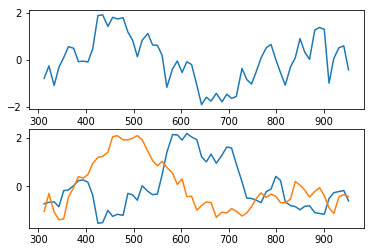

subject 15; gesture 1_0_1; avg 0.017314472344353262; sd 1.3375451742934273e-07
subject 15; gesture 1_0_1; PoV: 0.9999999984041326


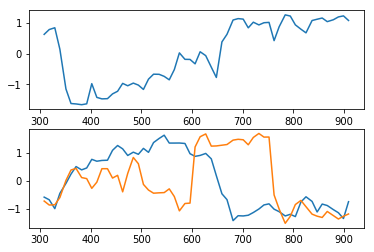

subject 15; gesture 1_0_2; avg 0.015465943184669605; sd 5.753940341879469e-10
subject 15; gesture 1_0_2; PoV: 0.9999999999997374


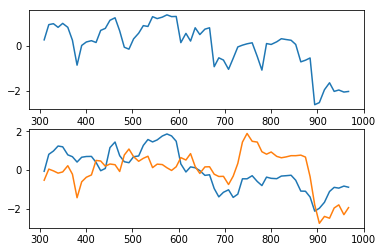

subject 28; gesture 1_1_2; avg 0.02087973291102703; sd 3.194611117592909e-09
subject 28; gesture 1_1_2; PoV: 0.9999999999991506


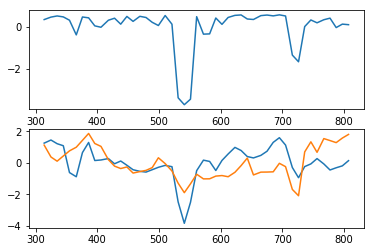

subject 28; gesture 1_1_1; avg 0.024593531507001276; sd 4.340838622032783e-09
subject 28; gesture 1_1_1; PoV: 0.9999999997755227


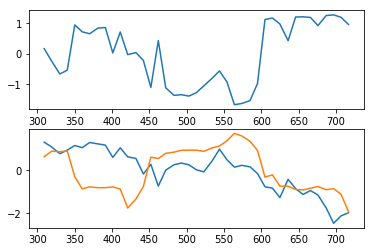

subject 28; gesture 1_0_1; avg 0.01865376079875911; sd 1.5105807712135065e-12
subject 28; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


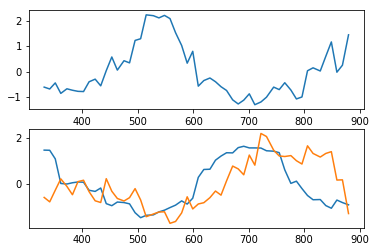

subject 28; gesture 1_0_2; avg 0.016797881049700408; sd 6.1624677888795e-08
subject 28; gesture 1_0_2; PoV: 0.9999999901382063


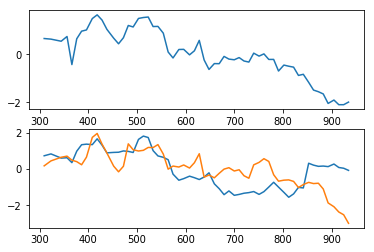

subject 12; gesture 1_1_2; avg 0.013434151071363275; sd 9.052340433564158e-12
subject 12; gesture 1_1_2; PoV: 0.9999999999999998


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


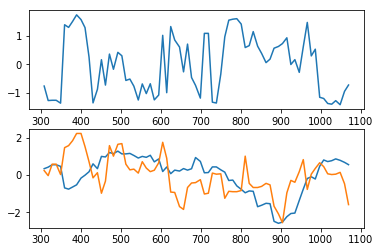

subject 12; gesture 1_1_1; avg 0.013783419915152447; sd 6.775045712047331e-12
subject 12; gesture 1_1_1; PoV: 0.9999999999999987


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


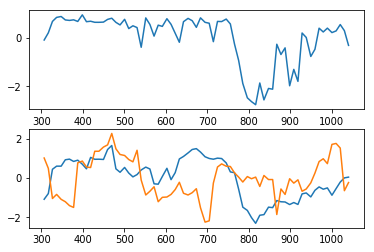

subject 12; gesture 1_0_1; avg 0.013544793129501029; sd 1.7271850027552655e-14
subject 12; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


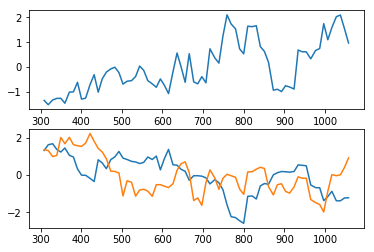

subject 12; gesture 1_0_2; avg 0.015833207297740178; sd 0.00011263802549192678
subject 12; gesture 1_0_2; PoV: 0.9978806627911505


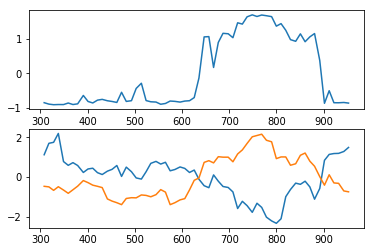

subject 19; gesture 1_1_2; avg 0.013026748794818467; sd 1.2335366537120332e-09
subject 19; gesture 1_1_2; PoV: 0.9999999999994091


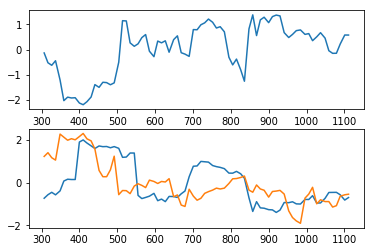

subject 19; gesture 1_1_1; avg 0.016606940502103523; sd 1.324399013355298e-10
subject 19; gesture 1_1_1; PoV: 0.9999999999999903


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


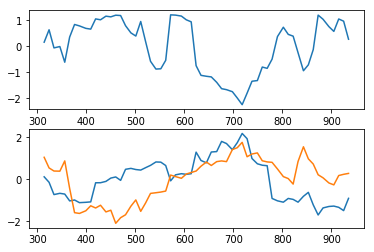

subject 19; gesture 1_0_1; avg 0.01941033502301356; sd 1.0165295129298702e-05
subject 19; gesture 1_0_1; PoV: 0.9999768066620252


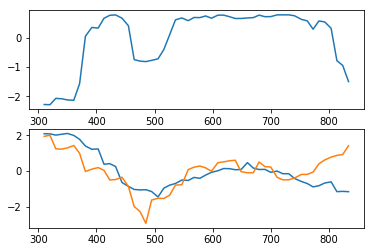

subject 19; gesture 1_0_2; avg 0.015680129174988785; sd 6.925841008371827e-12
subject 19; gesture 1_0_2; PoV: 0.9999999999999998


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


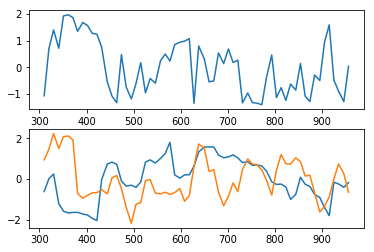

subject 07; gesture 1_1_2; avg 0.012133224075270663; sd 4.0653591890712674e-14
subject 07; gesture 1_1_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


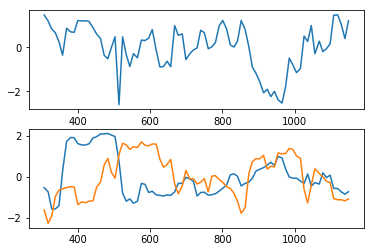

subject 07; gesture 1_1_1; avg 0.014521027675798744; sd 3.0654966877365146e-10
subject 07; gesture 1_1_1; PoV: 0.999999999999586


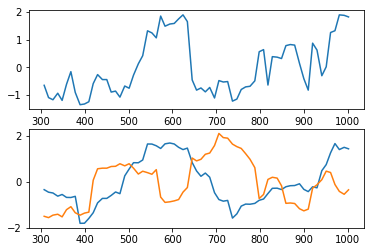

subject 07; gesture 1_0_1; avg 0.010899441356687736; sd 6.001851993028554e-14
subject 07; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


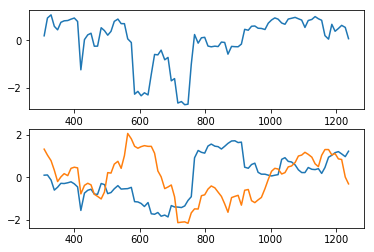

subject 07; gesture 1_0_2; avg 0.013585170985122238; sd 1.206279539251727e-12
subject 07; gesture 1_0_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


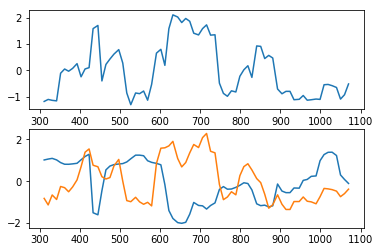

subject 20; gesture 1_1_2; avg 0.013196244505003603; sd 4.2981959725305225e-17
subject 20; gesture 1_1_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


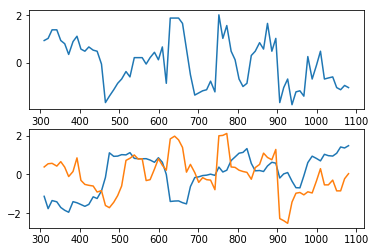

subject 20; gesture 1_1_1; avg 0.012424130310950281; sd 3.65076732751534e-12
subject 20; gesture 1_1_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


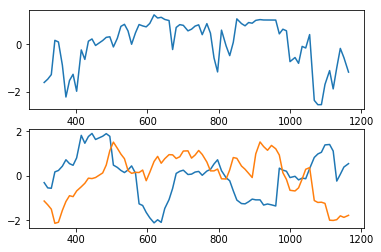

subject 20; gesture 1_0_1; avg 0.0127424714226505; sd 2.180008738359535e-11
subject 20; gesture 1_0_1; PoV: 0.9999999999999996


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


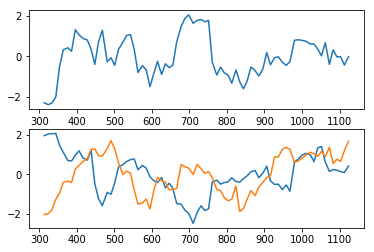

subject 20; gesture 1_0_2; avg 0.0097514759982723; sd 1.853971363763488e-16
subject 20; gesture 1_0_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


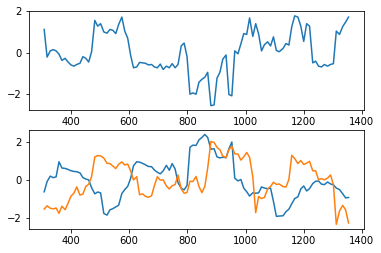

subject 31; gesture 1_1_2; avg 0.016161047669731546; sd 3.992602842443255e-12
subject 31; gesture 1_1_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


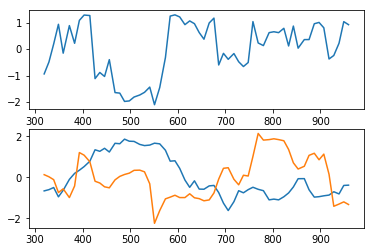

subject 31; gesture 1_1_1; avg 0.015447981525776611; sd 5.309512495011792e-08
subject 31; gesture 1_1_1; PoV: 0.9999999941570062


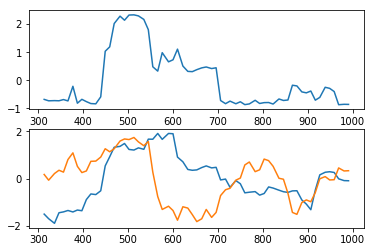

subject 31; gesture 1_0_1; avg 0.01054638422542177; sd 5.061951003215251e-13
subject 31; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


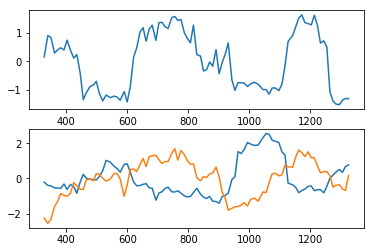

subject 31; gesture 1_0_2; avg 0.015389549116827562; sd 1.0141723538409356e-09
subject 31; gesture 1_0_2; PoV: 0.9999999999998312


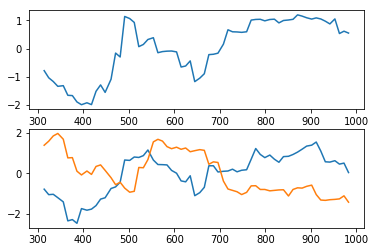

subject 13; gesture 1_1_2; avg 0.011151515976322269; sd 8.980745182203587e-12
subject 13; gesture 1_1_2; PoV: 0.9999999999999991


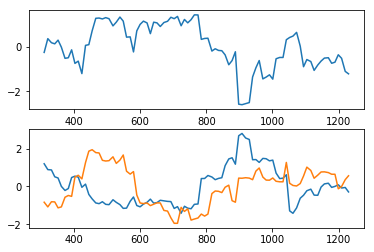

subject 13; gesture 1_1_1; avg 0.012955806838052258; sd 1.1660021333681532e-07
subject 13; gesture 1_1_1; PoV: 0.99999999790583


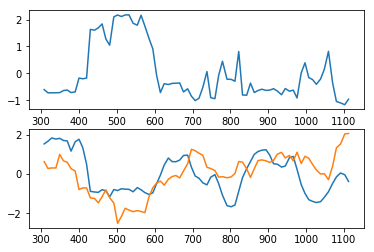

subject 13; gesture 1_0_1; avg 0.005559000286409445; sd 5.104078632478031e-14
subject 13; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


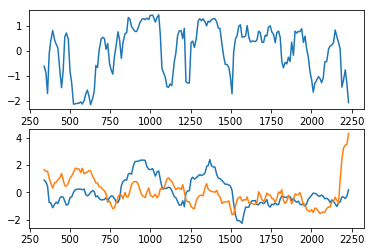

subject 13; gesture 1_0_2; avg 0.009766142965980846; sd 5.443133505631206e-13
subject 13; gesture 1_0_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


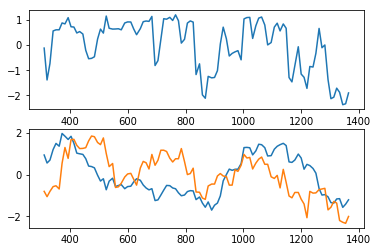

subject 36; gesture 1_1_2; avg 0.015356297108616837; sd 1.3583033364121482e-08
subject 36; gesture 1_1_2; PoV: 0.9999999999717145


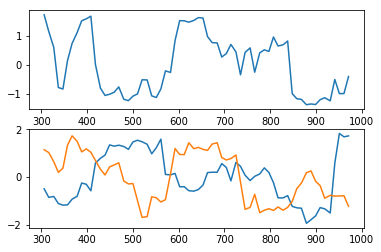

subject 36; gesture 1_1_1; avg 0.013224221443729173; sd 1.0075118944213904e-15
subject 36; gesture 1_1_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


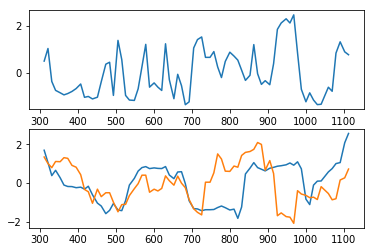

subject 36; gesture 1_0_1; avg 0.016721568093525815; sd 6.645714488221834e-14
subject 36; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


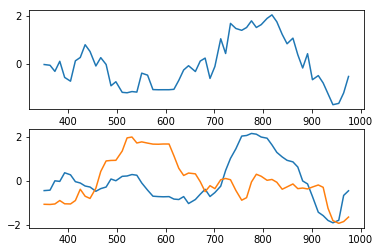

subject 36; gesture 1_0_2; avg 0.01678840670383619; sd 1.3814823257105595e-10
subject 36; gesture 1_0_2; PoV: 0.9999999999999906


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


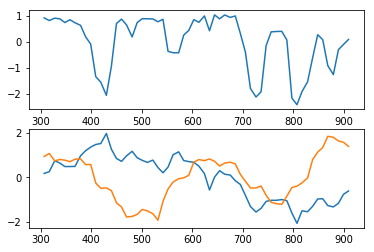

subject 24; gesture 1_1_2; avg 0.014126854098326735; sd 1.025965932364817e-13


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


subject 24; gesture 1_1_2; PoV: 1.0


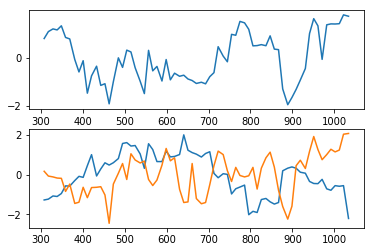

subject 24; gesture 1_1_1; avg 0.016076657103207423; sd 1.9209918170036224e-09
subject 24; gesture 1_1_1; PoV: 0.9999999999989253


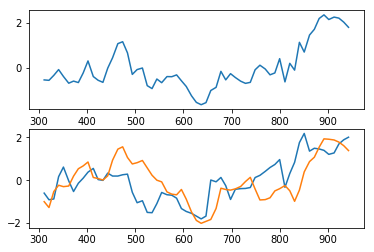

subject 24; gesture 1_0_1; avg 0.013143512430527152; sd 8.703680250466004e-11
subject 24; gesture 1_0_1; PoV: 0.9999999999999987


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


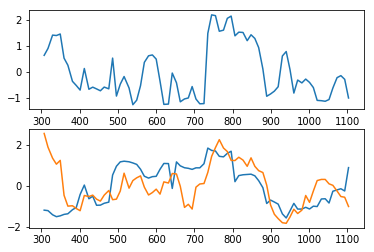

subject 24; gesture 1_0_2; avg 0.013830797021474668; sd 4.875206603055233e-11
subject 24; gesture 1_0_2; PoV: 0.9999999999999973


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


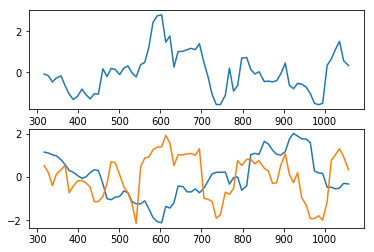

subject 33; gesture 1_1_2; avg 0.013739310857975749; sd 4.1745442606840075e-05
subject 33; gesture 1_1_2; PoV: 0.9997188551314563


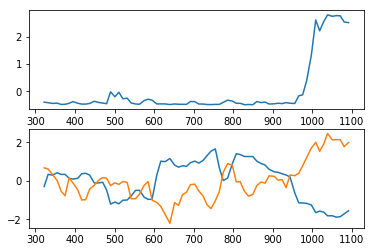

subject 33; gesture 1_1_1; avg 0.013233553574334506; sd 1.8354429268856046e-14
subject 33; gesture 1_1_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


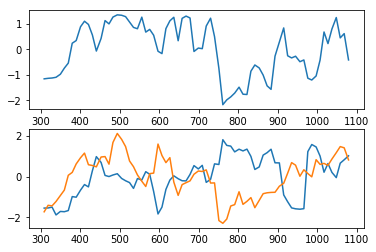

subject 33; gesture 1_0_1; avg 0.014325146317690721; sd 4.3949339943688395e-11
subject 33; gesture 1_0_1; PoV: 0.9999999999997854


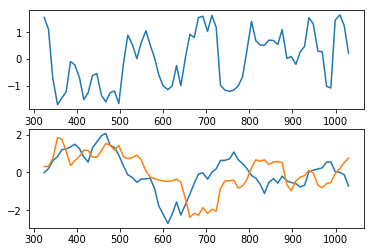

subject 33; gesture 1_0_2; avg 0.013245205967194565; sd 2.031113358254354e-09
subject 33; gesture 1_0_2; PoV: 0.9999999999968894


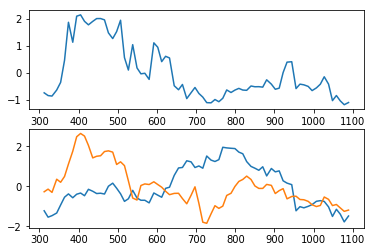

subject 11; gesture 1_1_2; avg 0.012686069462976193; sd 1.2692246925951079e-11
subject 11; gesture 1_1_2; PoV: 0.9999999999999984


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


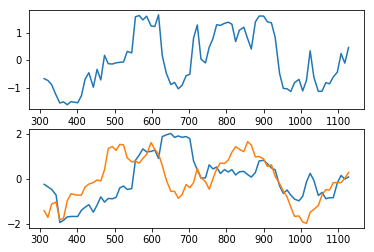

subject 11; gesture 1_1_1; avg 0.011432573421225412; sd 1.9619036603200207e-09
subject 11; gesture 1_1_1; PoV: 0.9999999999684164


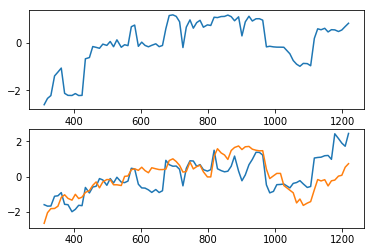

subject 11; gesture 1_0_1; avg 0.01192503152212872; sd 4.548015030740992e-15
subject 11; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


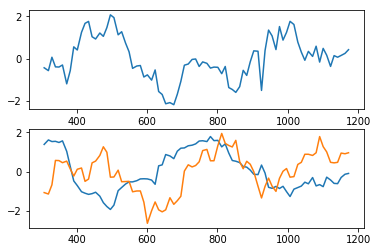

subject 11; gesture 1_0_2; avg 0.014106674984751086; sd 8.279896241933449e-13
subject 11; gesture 1_0_2; PoV: 1.0000000000000002


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


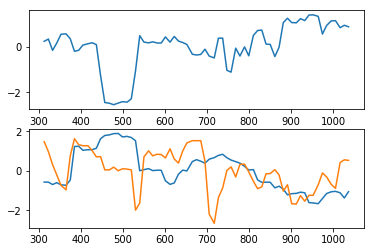

subject 35; gesture 1_1_2; avg 0.013583974281112424; sd 1.5975188157446382e-11
subject 35; gesture 1_1_2; PoV: 0.9999999999999998


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


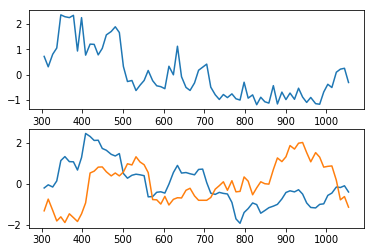

subject 35; gesture 1_1_1; avg 0.017685888752900513; sd 5.917018388189027e-15
subject 35; gesture 1_1_1; PoV: 0.9999999999999998


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


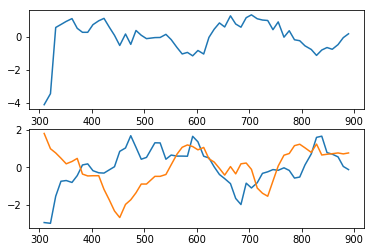

subject 35; gesture 1_0_1; avg 0.014764041725707128; sd 1.5101209927895712e-11
subject 35; gesture 1_0_1; PoV: 0.9999999999999989


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


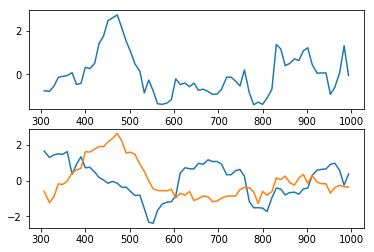

subject 35; gesture 1_0_2; avg 0.012700779082155625; sd 4.4410891273241107e-10
subject 35; gesture 1_0_2; PoV: 0.9999999999990685


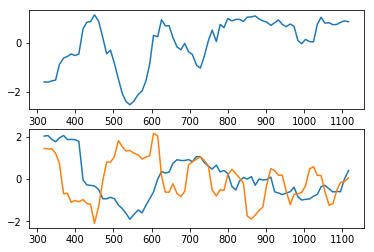

subject 22; gesture 1_1_2; avg 0.019023748707624938; sd 4.335891176926127e-10
subject 22; gesture 1_1_2; PoV: 0.9999999999999597


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


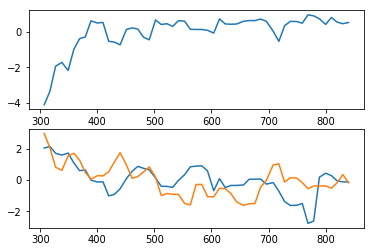

subject 22; gesture 1_1_1; avg 0.015451833154911164; sd 1.642464959705513e-09
subject 22; gesture 1_1_1; PoV: 0.9999999999995345


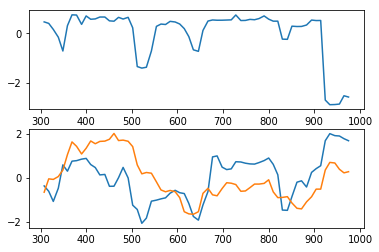

subject 22; gesture 1_0_1; avg 0.01727600004307551; sd 2.078937562784648e-07
subject 22; gesture 1_0_1; PoV: 0.9999999957500549


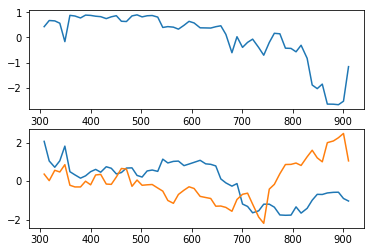

subject 22; gesture 1_0_2; avg 0.014103512709236907; sd 8.273003798021352e-14
subject 22; gesture 1_0_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


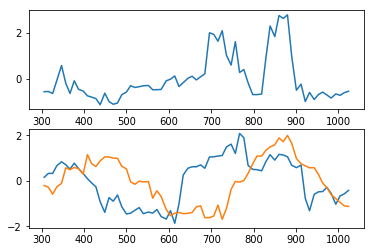

subject 34; gesture 1_1_2; avg 0.016169720939745016; sd 1.8616459958642293e-05
subject 34; gesture 1_1_2; PoV: 0.9999888506043677


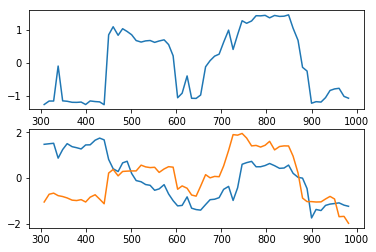

subject 34; gesture 1_1_1; avg 0.010618307355871527; sd 1.2076913331364657e-09
subject 34; gesture 1_1_1; PoV: 0.9999999999992012


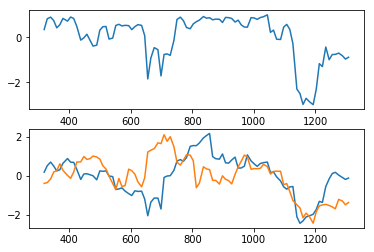

subject 34; gesture 1_0_1; avg 0.012538917747453877; sd 2.1713694404255399e-07
subject 34; gesture 1_0_1; PoV: 0.9999991319958071


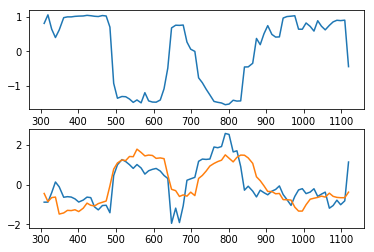

subject 34; gesture 1_0_2; avg 0.013009597147382163; sd 3.069858866282957e-10
subject 34; gesture 1_0_2; PoV: 0.999999999999798


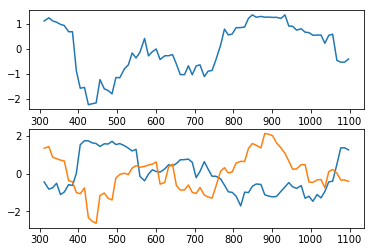

subject 10; gesture 1_1_2; avg 0.015796972397702946; sd 0.005977619927651606
subject 10; gesture 1_1_2; PoV: 0.7260236682900401


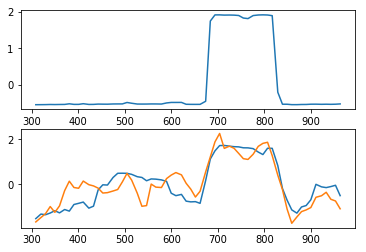

subject 10; gesture 1_1_1; avg 0.013345944701305108; sd 2.967423355360642e-10
subject 10; gesture 1_1_1; PoV: 0.9999999999998888


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


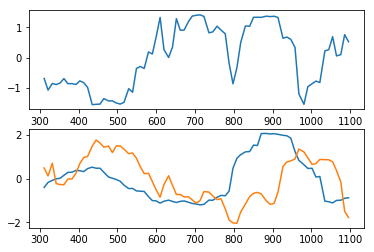

subject 10; gesture 1_0_1; avg 0.00858327044862264; sd 2.0533006343042386e-16
subject 10; gesture 1_0_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


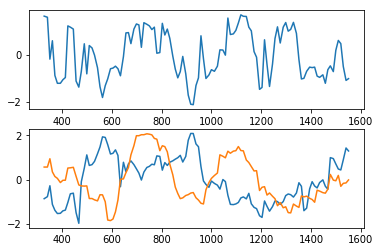

subject 10; gesture 1_0_2; avg 0.014543748396282006; sd 2.734427984172292e-12
subject 10; gesture 1_0_2; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


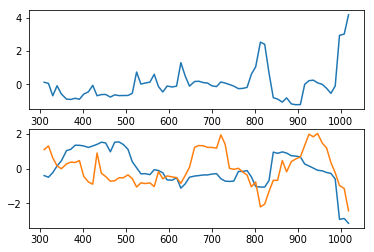

subject 02; gesture 1_1_2; avg 0.013899260117683164; sd 7.564077072067015e-10
subject 02; gesture 1_1_2; PoV: 0.9999999999981013


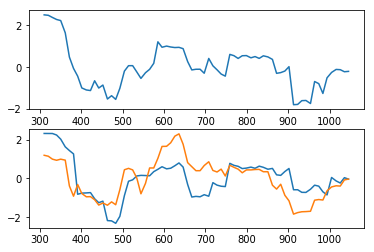

subject 02; gesture 1_1_1; avg 0.011836245198302292; sd 4.4098539042490775e-14
subject 02; gesture 1_1_1; PoV: 1.0


/home/svois/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


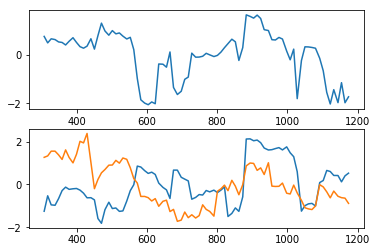

subject 02; gesture 1_0_1; avg 0.015532500383810354; sd 2.2451463049889164e-07
subject 02; gesture 1_0_1; PoV: 0.9999999873227402


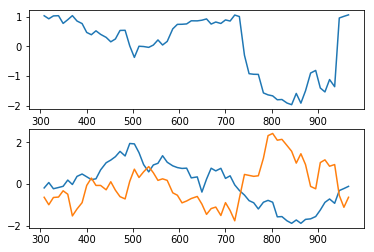

subject 02; gesture 1_0_2; avg 0.013214761421933226; sd 1.057909079406765e-06
subject 02; gesture 1_0_2; PoV: 0.9999993142806759


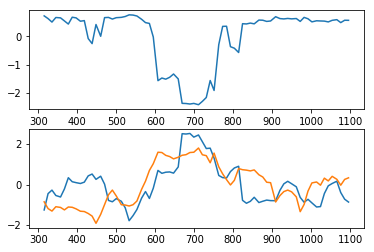

In [5]:
decomp_g1_syn = {}

for s, gdict in g1_dict_synerg.items():
    decomp_g1_syn[s] = {}
    for g, a in gdict.items():
        print(f"subject {s}; gesture {g}; avg {a.mean()}; sd {a.std()}")
        evals, evecs = la.eig(a)
        evals = evals.real
        sort_idx = np.argsort(-evals)
        evals = evals[sort_idx]
        evecs = evecs[:, sort_idx]
        # calc percent of variance explained
        print(f"subject {s}; gesture {g}; PoV: {evals[0].real / evals.real.sum()}")
        # do PCA
        res = a @ evecs[:, 0]
        res = scale(res.real)
        decomp_g1_syn[s][g] = res
        # plot results
        plt.subplot(211)
        plt.plot(dc.data_set_smooth[s][g][:,0], res)
        plt.subplot(212)
        plt.plot(dc.data_set_smooth[s][g][:,0], dc.data_set_smooth[s][g][:,1])
        plt.plot(dc.data_set_smooth[s][g][:,0], dc.data_set_smooth[s][g][:,2])
        plt.show()

---

Problem cases:

subject 30; gesture 1_1_2

subject 06; gesture 1_0_2

subject 09; gesture 1_1_2

subject 03; gesture 1_1_2

subject 03; gesture 1_1_1

subject 05; gesture 1_0_1

subject 21; gesture 1_0_2

subject 21; gesture 1_1_1

subject 01; gesture 1_1_2

subject 01; gesture 1_1_1

subject 01; gesture 1_0_2

26
gesture 1_1_2

gesture 1_0_1

32
gesture 1_1_1

08
gesture 1_1_2

gesture 1_0_1

27
gesture 1_1_1

gesture 1_0_2

23
gesture 1_1_2

gesture 1_1_1

gesture 1_0_1

25
gesture 1_0_1


18
gesture 1_1_2

gesture 1_1_1

29
gesture 1_1_1

gesture 1_0_1

15
gesture 1_1_1


12
gesture 1_1_2

gesture 1_0_1

19
gesture 1_1_1

07
gesture 1_1_2
gesture 1_0_1
gesture 1_0_2

20
gesture 1_0_1

31
gesture 1_1_2
gesture 1_0_1

13
gesture 1_1_2
gesture 1_1_1
gesture 1_0_1

36
gesture 1_1_2

24
gesture 1_1_1
gesture 1_0_1

33
gesture 1_0_1

11
gesture 1_1_2
gesture 1_1_1
gesture 1_0_1
gesture 1_0_2

35
gesture 1_0_2

22
gesture 1_0_1
gesture 1_0_2

34
gesture 1_0_1
gesture 1_0_2

10
gesture 1_1_2
gesture 1_0_1

---

In [7]:
# average distance between all gestures in subject s cross subject v (cartesian product)
# i.e. average distance between subjects' gestures
compares = {}
for s1, gdict1 in decomp_g1_syn.items():
    compares[s1] = {}
    for s2, gdict2 in decomp_g1_syn.items():
        compares[s1][s2] = []
        for g1 in gdict1.values():
            for g2 in gdict2.values():
                compares[s1][s2].append(dtw(g1, g2))
        compares[s1][s2] = np.average(compares[s1][s2])

In [11]:
np.average([d for d in compares["30"].values()])

6.369449537603151